# Data-Level Imbalance Handling Techniques: A Comparative Study on Credit Card Fraud Detection
DSCI Senior Project  
Malak Gaballa - Masa Tantawy - Moustafa El Mahdy
# Modeling Phase

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter
from google.colab import drive
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
import tensorflow.keras as kr
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, roc_auc_score, classification_report

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ros = pd.read_csv('/content/drive/MyDrive/Thesis/CSVs/df_ros.csv')
rus = pd.read_csv('/content/drive/MyDrive/Thesis/CSVs/df_rus.csv')
smote = pd.read_csv('/content/drive/MyDrive/Thesis/CSVs/df_smote.csv')
smoteen = pd.read_csv('/content/drive/MyDrive/Thesis/CSVs/df_smoteen.csv')
smtk = pd.read_csv('/content/drive/MyDrive/Thesis/CSVs/df_smotetomek.csv')
tkl = pd.read_csv('/content/drive/MyDrive/Thesis/CSVs/df_tl.csv')
test= pd.read_csv('/content/drive/MyDrive/Thesis/CSVs/test.csv')

# Logistic Regression

In [ ]:
metrics_dict = {}

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, roc_curve

### Random Oversampling

AUC-ROC: 0.91359
Accuracy: 0.88877
Recall: 0.74825
Precision: 0.02553
F1 Score: 0.04937


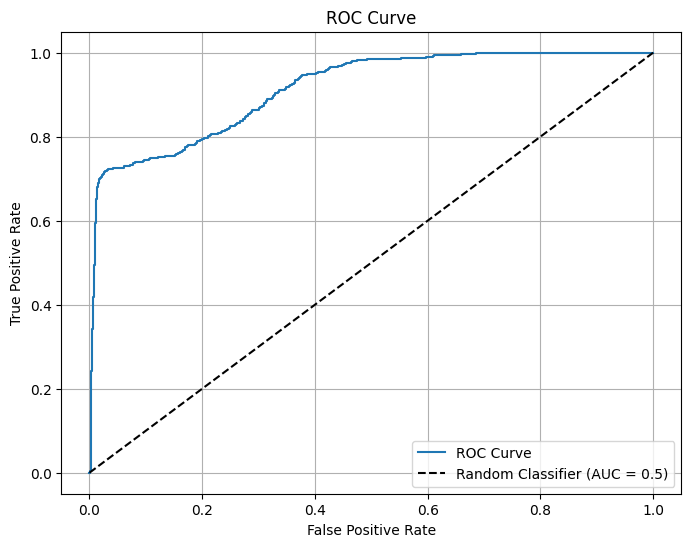

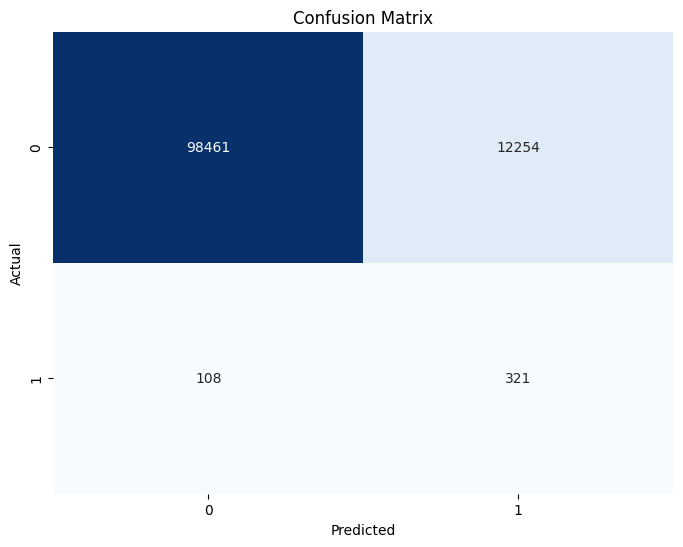

In [ ]:
# Select features and target
X_train = ros.drop('is_fraud', axis=1)
y_train = ros['is_fraud']

# Assume the test dataset is already split into features and target
X_test = test.drop('is_fraud', axis=1)
y_test = test['is_fraud']

# Initialize and fit logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities on test set
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Predict on test set
y_pred = model.predict(X_test)


# Compute metrics
cm = confusion_matrix(y_test, y_pred)
auc_roc = round(roc_auc_score(y_test, y_pred_proba), 5)
acc = round(accuracy_score(y_test, y_pred), 5)
recall = round(recall_score(y_test, y_pred), 5)
precision = round(precision_score(y_test, y_pred), 5)
f1 = round(f1_score(y_test, y_pred), 5)


metrics_dict['Random Oversampling'] = {'AUC-ROC': auc_roc, 'Accuracy': acc, 'Recall': recall, 'Precision': precision, 'F1 Score': f1}

# Print metrics
print(f"AUC-ROC: {auc_roc}")
print(f"Accuracy: {acc}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")

# Plot ROC Curve
fpr_ros, tpr_ros, thresholds_ros = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr_ros, tpr_ros, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import pickle

# Save model
with open('/content/drive/MyDrive/Thesis/Models/pickles/logros.pkl', 'wb') as file:
    pickle.dump(model, file)

### Random Undersampling

AUC-ROC: 0.91376
Accuracy: 0.8819
Recall: 0.75524
Precision: 0.02428
F1 Score: 0.04705


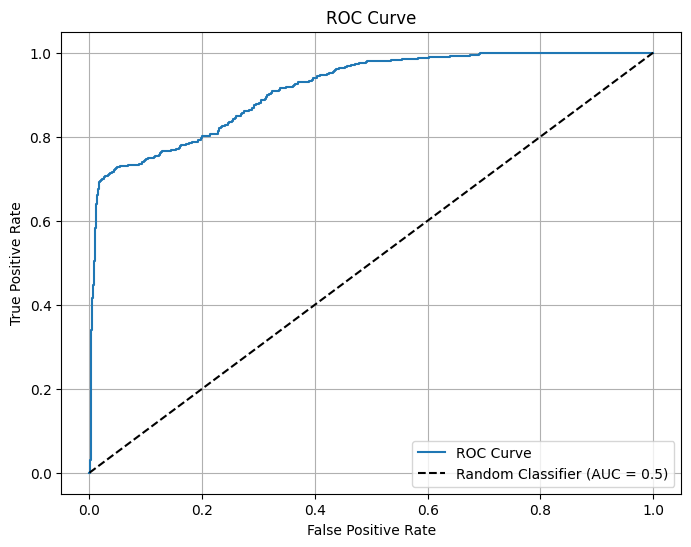

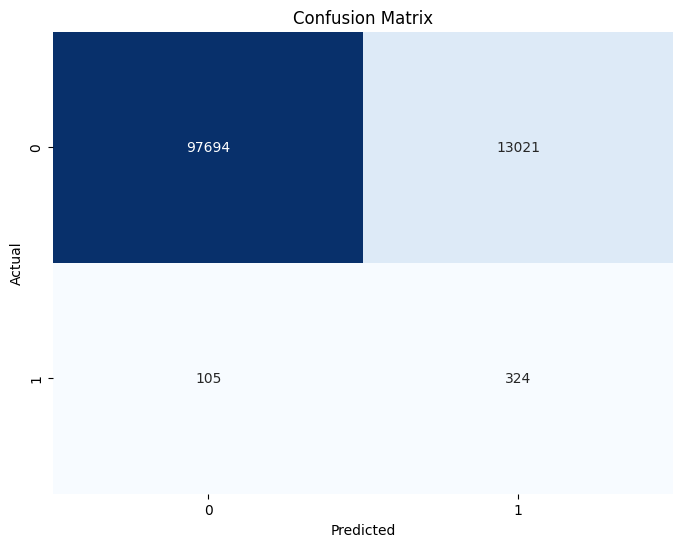

In [ ]:
# Select features and target
X_train = rus.drop('is_fraud', axis=1)
y_train = rus['is_fraud']


# Initialize and fit logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities on test set
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Predict on test set
y_pred = model.predict(X_test)

# Compute metrics
cm = confusion_matrix(y_test, y_pred)
auc_roc = round(roc_auc_score(y_test, y_pred_proba), 5)
acc = round(accuracy_score(y_test, y_pred), 5)
recall = round(recall_score(y_test, y_pred), 5)
precision = round(precision_score(y_test, y_pred), 5)
f1 = round(f1_score(y_test, y_pred), 5)


metrics_dict['Random Undersampling'] = {'AUC-ROC': auc_roc, 'Accuracy': acc, 'Recall': recall, 'Precision': precision, 'F1 Score': f1}

# Print metrics
print(f"AUC-ROC: {auc_roc}")
print(f"Accuracy: {acc}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")

# Plot ROC Curve
fpr_rus, tpr_rus, thresholds_rus = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rus, tpr_rus, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import pickle

# Save model
with open('/content/drive/MyDrive/Thesis/Models/pickles/logrus.pkl', 'wb') as file:
    pickle.dump(model, file)

### SMOTE

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AUC-ROC: 0.8726
Accuracy: 0.99305
Recall: 0.67599
Precision: 0.31419
F1 Score: 0.42899


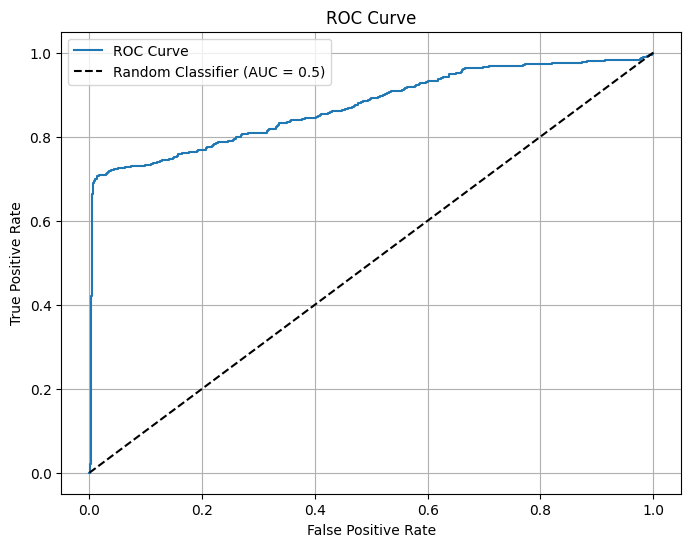

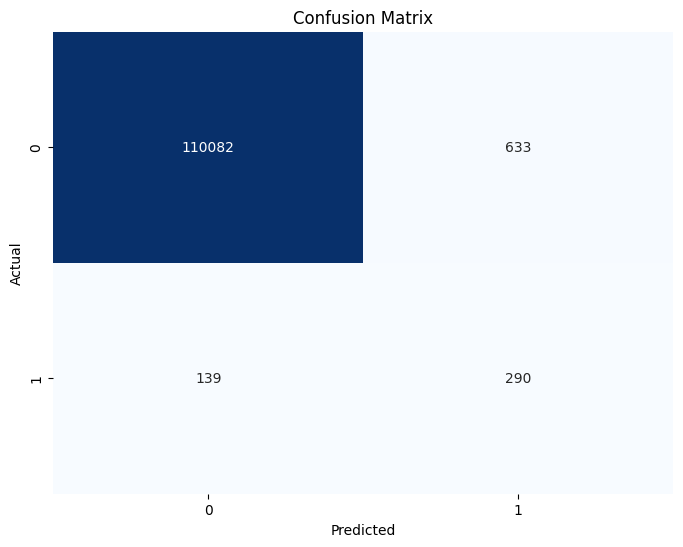

In [ ]:
# Select features and target
X_train = smote.drop('is_fraud', axis=1)
y_train = smote['is_fraud']

# Assume the test dataset is already split into features and target
X_test = test.drop('is_fraud', axis=1)
y_test = test['is_fraud']

# Initialize and fit logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities on test set
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Predict on test set
y_pred = model.predict(X_test)



# Compute metrics
cm = confusion_matrix(y_test, y_pred)
auc_roc = round(roc_auc_score(y_test, y_pred_proba), 5)
acc = round(accuracy_score(y_test, y_pred), 5)
recall = round(recall_score(y_test, y_pred), 5)
precision = round(precision_score(y_test, y_pred), 5)
f1 = round(f1_score(y_test, y_pred), 5)


metrics_dict['Smote'] = {'AUC-ROC': auc_roc, 'Accuracy': acc, 'Recall': recall, 'Precision': precision, 'F1 Score': f1}


# Print metrics
print(f"AUC-ROC: {auc_roc}")
print(f"Accuracy: {acc}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")

# Plot ROC Curve
fpr_smote, tpr_smote, thresholds_smote = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr_smote, tpr_smote, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import pickle

# Save model
with open('/content/drive/MyDrive/Thesis/Models/pickles/logsmote.pkl', 'wb') as file:
    pickle.dump(model, file)

### Smoteen

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AUC-ROC: 0.87281
Accuracy: 0.99269
Recall: 0.68065
Precision: 0.30165
F1 Score: 0.41804


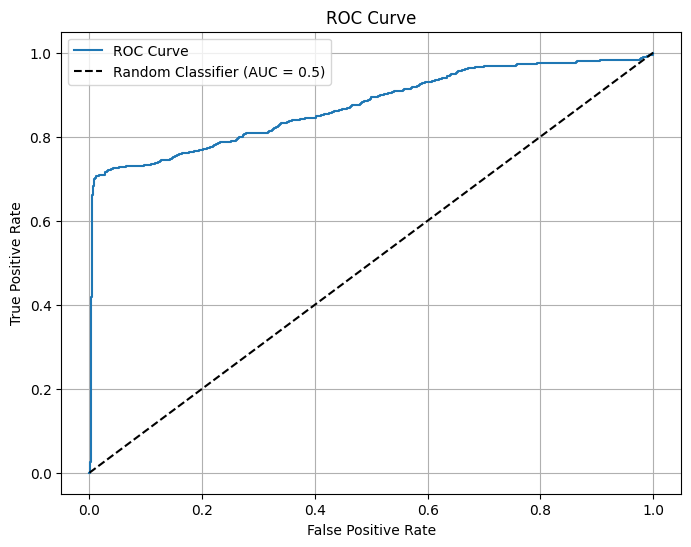

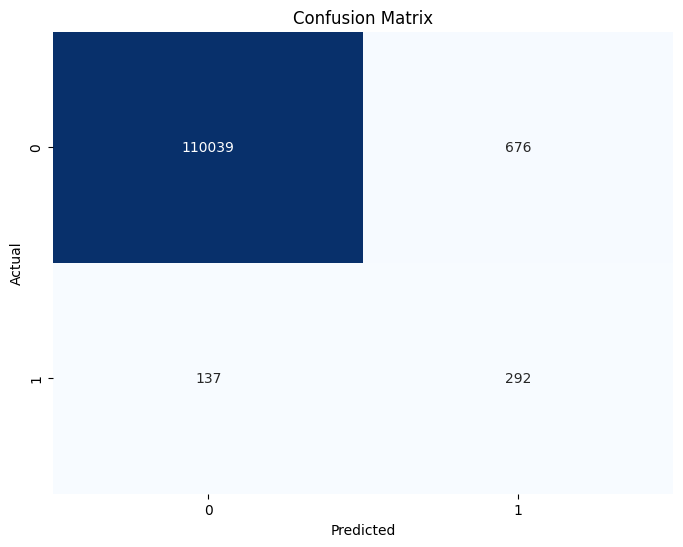

In [ ]:
# Select features and target
X_train = smoteen.drop('is_fraud', axis=1)
y_train = smoteen['is_fraud']

# Assume the test dataset is already split into features and target
X_test = test.drop('is_fraud', axis=1)
y_test = test['is_fraud']

# Initialize and fit logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities on test set
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Predict on test set
y_pred = model.predict(X_test)



# Compute metrics
cm = confusion_matrix(y_test, y_pred)
auc_roc = round(roc_auc_score(y_test, y_pred_proba), 5)
acc = round(accuracy_score(y_test, y_pred), 5)
recall = round(recall_score(y_test, y_pred), 5)
precision = round(precision_score(y_test, y_pred), 5)
f1 = round(f1_score(y_test, y_pred), 5)


metrics_dict['Smoteen'] = {'AUC-ROC': auc_roc, 'Accuracy': acc, 'Recall': recall, 'Precision': precision, 'F1 Score': f1}


# Print metrics
print(f"AUC-ROC: {auc_roc}")
print(f"Accuracy: {acc}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")

# Plot ROC Curve
fpr_smoteen, tpr_smoteen, thresholds_smoteen = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr_smoteen, tpr_smoteen, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import pickle

# Save model
with open('/content/drive/MyDrive/Thesis/Models/pickles/logsmoteen.pkl', 'wb') as file:
    pickle.dump(model, file)

### SmoteTomek

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AUC-ROC: 0.8726
Accuracy: 0.99305
Recall: 0.67599
Precision: 0.31419
F1 Score: 0.42899


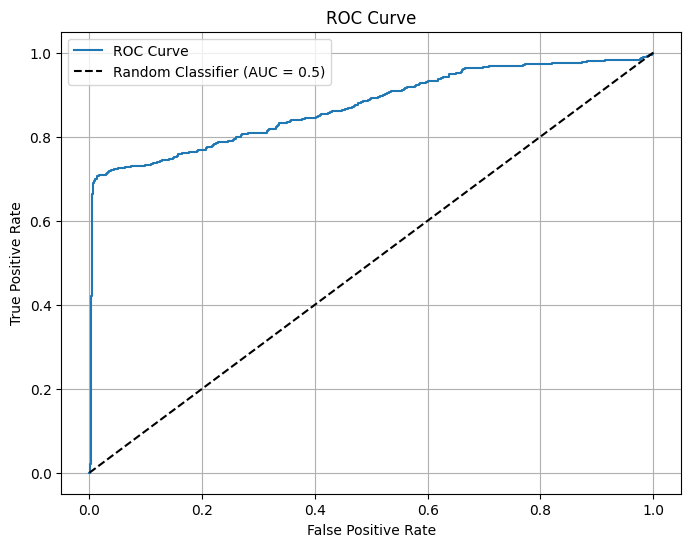

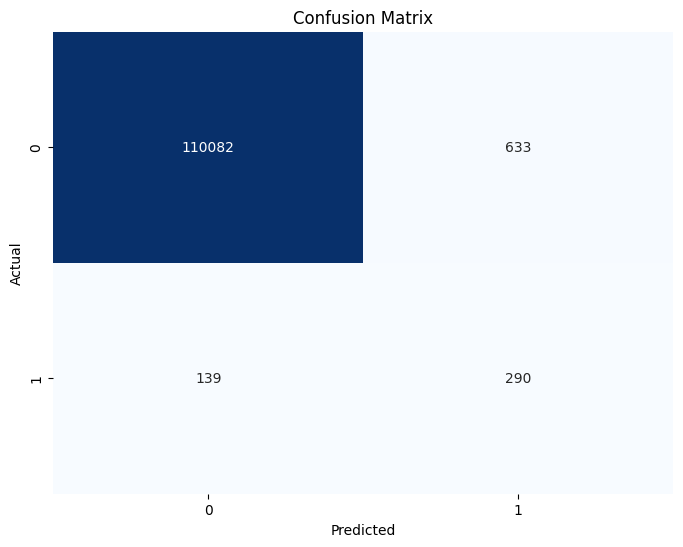

In [ ]:
# Select features and target
X_train = smtk.drop('is_fraud', axis=1)
y_train = smtk['is_fraud']

# Assume the test dataset is already split into features and target
X_test = test.drop('is_fraud', axis=1)
y_test = test['is_fraud']

# Initialize and fit logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities on test set
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Predict on test set
y_pred = model.predict(X_test)

# Compute metrics
cm = confusion_matrix(y_test, y_pred)
auc_roc = round(roc_auc_score(y_test, y_pred_proba), 5)
acc = round(accuracy_score(y_test, y_pred), 5)
recall = round(recall_score(y_test, y_pred), 5)
precision = round(precision_score(y_test, y_pred), 5)
f1 = round(f1_score(y_test, y_pred), 5)


metrics_dict['SmoteTomek'] = {'AUC-ROC': auc_roc, 'Accuracy': acc, 'Recall': recall, 'Precision': precision, 'F1 Score': f1}


# Print metrics
print(f"AUC-ROC: {auc_roc}")
print(f"Accuracy: {acc}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")

# Plot ROC Curve
fpr_smtk, tpr_smtk, thresholds_smtk = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr_smtk, tpr_smtk, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import pickle

# Save model
with open('/content/drive/MyDrive/Thesis/CSVs/logsmtk.pkl', 'wb') as file:
    pickle.dump(model, file)

### TomekLinks

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AUC-ROC: 0.81522
Accuracy: 0.99594
Recall: 0.0
Precision: 0.0
F1 Score: 0.0


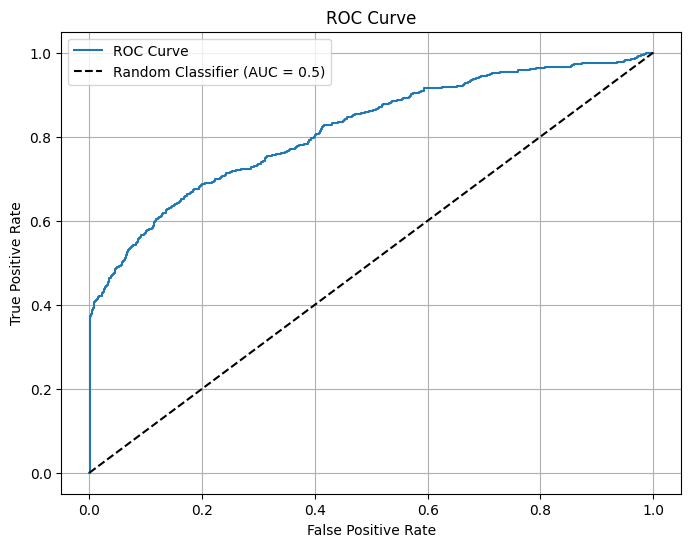

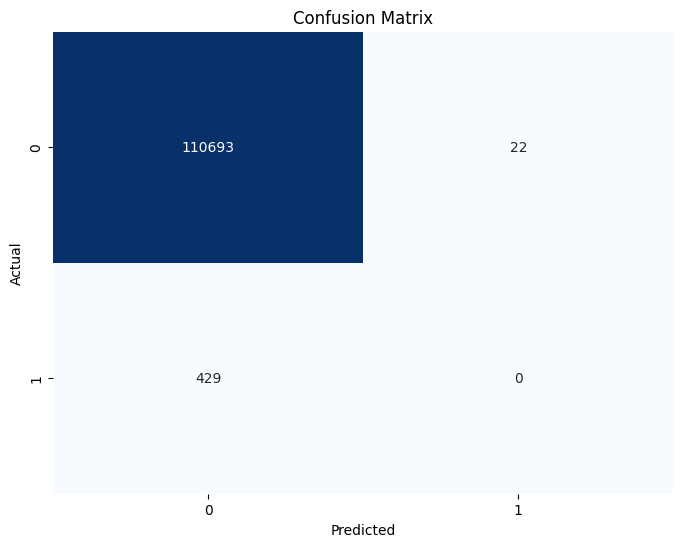

In [ ]:
# Select features and target
X_train = tkl.drop('is_fraud', axis=1)
y_train = tkl['is_fraud']

# Assume the test dataset is already split into features and target
X_test = test.drop('is_fraud', axis=1)
y_test = test['is_fraud']

# Initialize and fit logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities on test set
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Predict on test set
y_pred = model.predict(X_test)



# Compute metrics
cm = confusion_matrix(y_test, y_pred)
auc_roc = round(roc_auc_score(y_test, y_pred_proba), 5)
acc = round(accuracy_score(y_test, y_pred), 5)
recall = round(recall_score(y_test, y_pred), 5)
precision = round(precision_score(y_test, y_pred), 5)
f1 = round(f1_score(y_test, y_pred), 5)


metrics_dict['TomekLinks'] = {'AUC-ROC': auc_roc, 'Accuracy': acc, 'Recall': recall, 'Precision': precision, 'F1 Score': f1}


# Print metrics
print(f"AUC-ROC: {auc_roc}")
print(f"Accuracy: {acc}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")

# Plot ROC Curve
fpr_tkl, tpr_tkl, thresholds_tkl = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr_tkl, tpr_tkl, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import pickle

# Save model
with open('/content/drive/MyDrive/Thesis/CSVs/logtkl.pkl', 'wb') as file:
    pickle.dump(model, file)

## Comparative Analysis

In [ ]:
metrics_df = pd.DataFrame.from_dict(metrics_dict, orient='index')
metrics_df

,AUC-ROC,Accuracy,Recall,Precision,F1 Score
Random Oversampling,0.91359,0.88877,0.74825,0.02553,0.04937
Random Undersampling,0.91376,0.88190,0.75524,0.02428,0.04705
Smote,0.87260,0.99305,0.67599,0.31419,0.42899
Smoteen,0.87281,0.99269,0.68065,0.30165,0.41804
SmoteTomek,0.87260,0.99305,0.67599,0.31419,0.42899
TomekLinks,0.81522,0.99594,0.00000,0.00000,0.00000


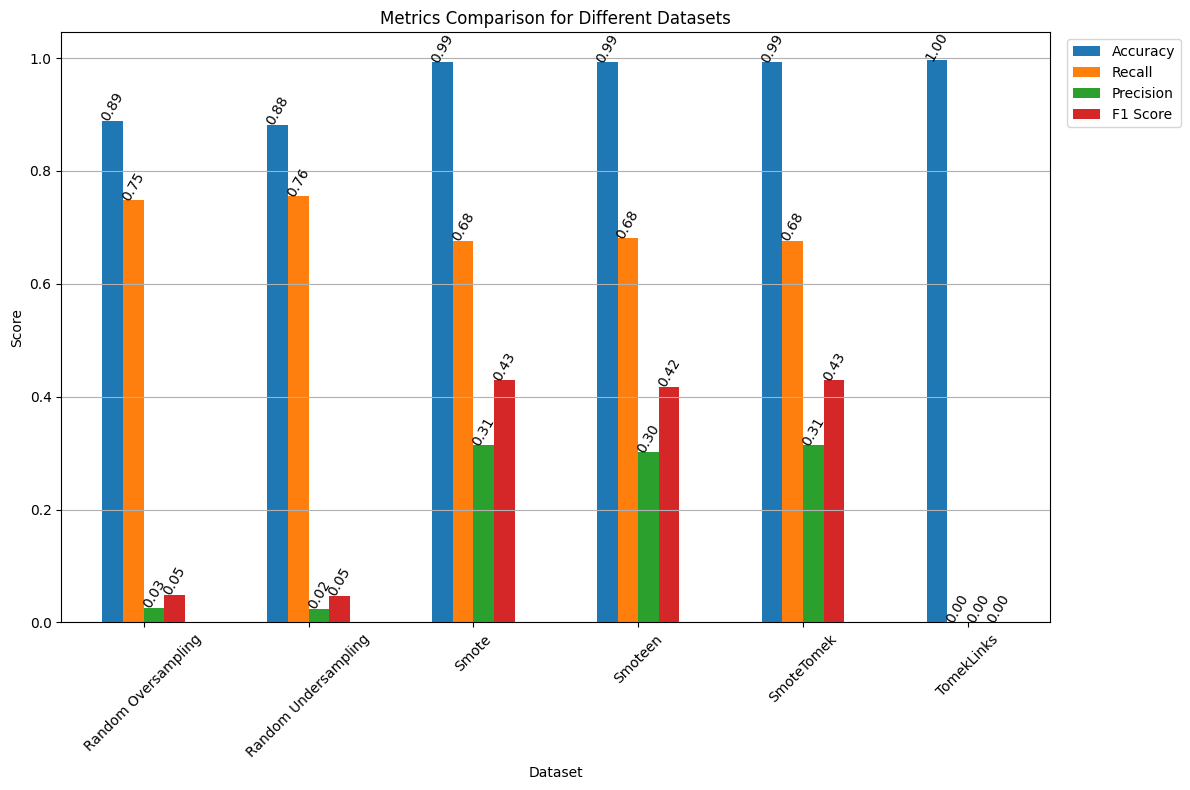

In [ ]:
# Plot metrics comparison
plt.figure(figsize=(12, 8))
ax = metrics_df.iloc[:,1:].plot(kind='bar', ax=plt.gca())
plt.title('Metrics Comparison for Different Datasets')
plt.xlabel('Dataset')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.01, 1), loc="upper left")

# Annotate bars with metric values
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',rotation=60, xytext=(0, 10), textcoords='offset points')

plt.grid(axis='y')
plt.tight_layout()
plt.show()

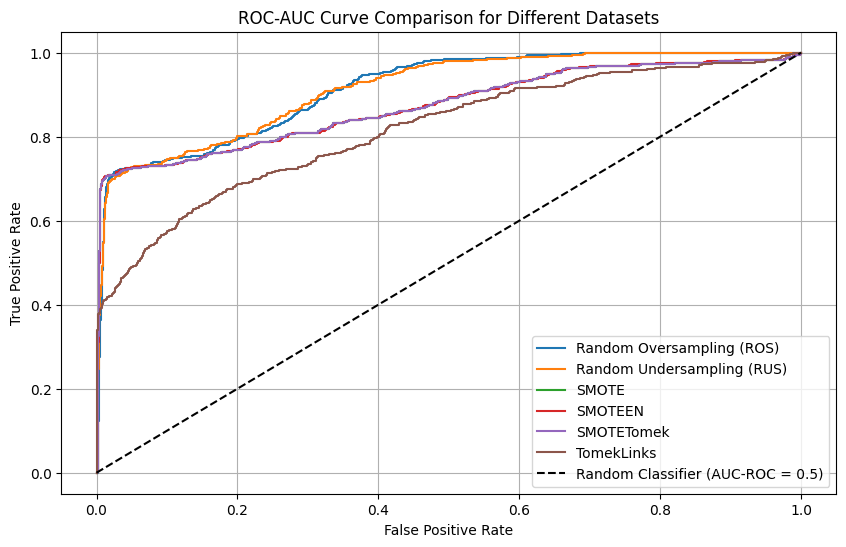

In [ ]:
# Plot ROC-AUC Curves
plt.figure(figsize=(10, 6))

# Plot ROC curves for each dataset
plt.plot(fpr_ros, tpr_ros, label='Random Oversampling (ROS)')
plt.plot(fpr_rus, tpr_rus, label='Random Undersampling (RUS)')
plt.plot(fpr_smote, tpr_smote, label='SMOTE')
plt.plot(fpr_smoteen, tpr_smoteen, label='SMOTEEN')
plt.plot(fpr_smtk, tpr_smtk, label='SMOTETomek')
plt.plot(fpr_tkl, tpr_tkl, label='TomekLinks')

# Plot random classifier line
plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random Classifier (AUC-ROC = 0.5)')

# Set plot labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve Comparison for Different Datasets')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

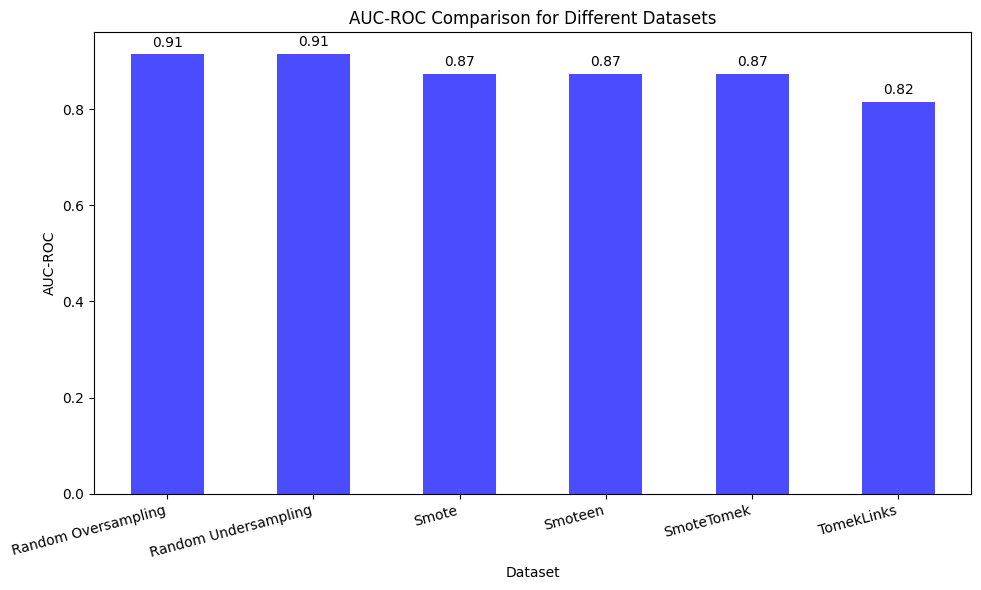

In [ ]:
# Plot AUC-ROC values
plt.figure(figsize=(10, 6))
metrics_df['AUC-ROC'].plot(kind='bar', color='blue', alpha=0.7)

# Add labels and title
plt.title('AUC-ROC Comparison for Different Datasets')
plt.xlabel('Dataset')
plt.ylabel('AUC-ROC')

# Add value labels on top of each bar
for i, auc_roc in enumerate(metrics_df['AUC-ROC']):
    plt.text(i, auc_roc + 0.01, f'{auc_roc:.2f}', ha='center', va='bottom')

# Show plot
plt.xticks(rotation=15, ha='right')
plt.tight_layout()
plt.show()


## De-Standardization

In [ ]:
with open('/content/drive/MyDrive/Thesis/CSVs/ogdata.pkl', 'rb') as file:
    scaler = pickle.load(file)

# Assuming 'X_standardized' is your standardized data
X = scaler.inverse_transform(ros.iloc[:,:14])
X

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Thesis/CSVs/ogdata.pkl'

# UNDER SAMPLING TECHNIQUES

## 1. Random UnderSampling DF

In [ ]:
metrics_dict_ml = {}

#### a. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.metrics import roc_curve

In [ ]:
# Select features and target
X_train = rus.drop('is_fraud', axis=1)
y_train = rus['is_fraud']

# Assume the test dataset is already split into features and target
X_test = test.drop('is_fraud', axis=1)
y_test = test['is_fraud']

In [ ]:
rus.head()

,amt,gender,city_pop,Month,Hour,age,job_Agriculture,job_Business,job_Creative,job_Education,...,region_West,distance,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,is_fraud
0,0.456900,1,2.213432,0.753949,1.496265,0.147695,1,0,0,0,...,0,-0.135589,0,1,0,0,0,0,0,0
1,0.098741,1,-0.292589,0.753949,1.349442,1.351636,0,0,0,0,...,0,0.089062,0,1,0,0,0,0,0,0
2,-0.407365,1,-0.292842,0.248440,1.055796,0.090365,0,0,0,0,...,0,1.601913,0,0,0,0,1,0,0,0
3,-0.393011,1,0.257445,-1.268088,1.055796,-1.400229,0,0,0,0,...,0,0.840562,1,0,0,0,0,0,0,0
4,-0.420061,1,-0.290441,0.248440,1.055796,-1.457559,0,0,0,0,...,0,0.472883,0,0,0,0,1,0,0,0


In [ ]:
# Initialize the Random Forest classifier
rf_model = RandomForestClassifier()

# Train the classifier on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_model.predict(X_test)

y_pred_proba = rf_model.predict_proba(X_test)[:, 1]


AUC-ROC: 0.99664
Accuracy: 0.96958
Recall: 0.9627
Precision: 0.10932
F1 Score: 0.19634


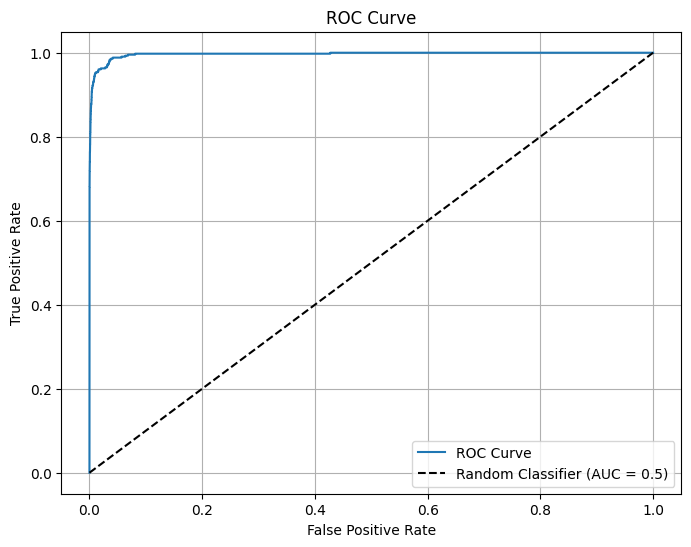

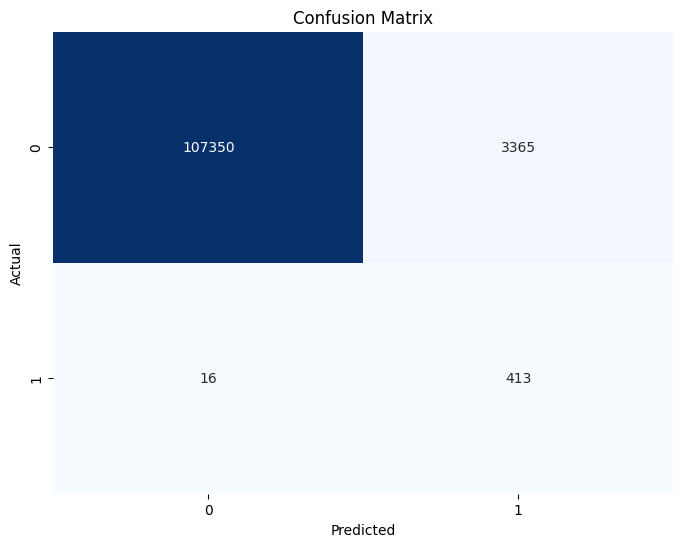

In [ ]:
# Compute metrics
cm = confusion_matrix(y_test, y_pred)
auc_roc = round(roc_auc_score(y_test, y_pred_proba), 5)
acc = round(accuracy_score(y_test, y_pred), 5)
recall = round(recall_score(y_test, y_pred), 5)
precision = round(precision_score(y_test, y_pred), 5)
f1 = round(f1_score(y_test, y_pred), 5)


metrics_dict_ml['RF: Random Undersampling'] = {'AUC-ROC': auc_roc, 'Accuracy': acc, 'Recall': recall, 'Precision': precision, 'F1 Score': f1}

# Print metrics
print(f"AUC-ROC: {auc_roc}")
print(f"Accuracy: {acc}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")

# Plot ROC Curve
fpr_rus, tpr_rus, thresholds_rus = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rus, tpr_rus, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import pickle

# Save model
with open('/content/drive/MyDrive/Thesis/Models/pickles/rus_rf.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

### b. Extreme Gradient Boost (XGBoost)


In [ ]:
from xgboost import XGBClassifier


In [ ]:
# Select features and target
X_train = rus.drop('is_fraud', axis=1)
y_train = rus['is_fraud']

# Assume the test dataset is already split into features and target
X_test = test.drop('is_fraud', axis=1)
y_test = test['is_fraud']

# Initialize and fit logistic regression model
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Predict probabilities on test set
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# Predict on test set
y_pred = xgb_model.predict(X_test)

AUC-ROC: 0.99592
Accuracy: 0.96781
Recall: 0.98135
Precision: 0.10549
F1 Score: 0.1905


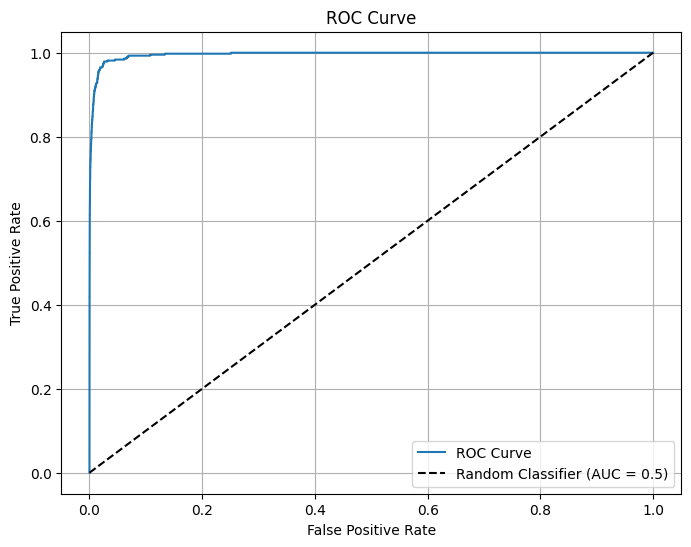

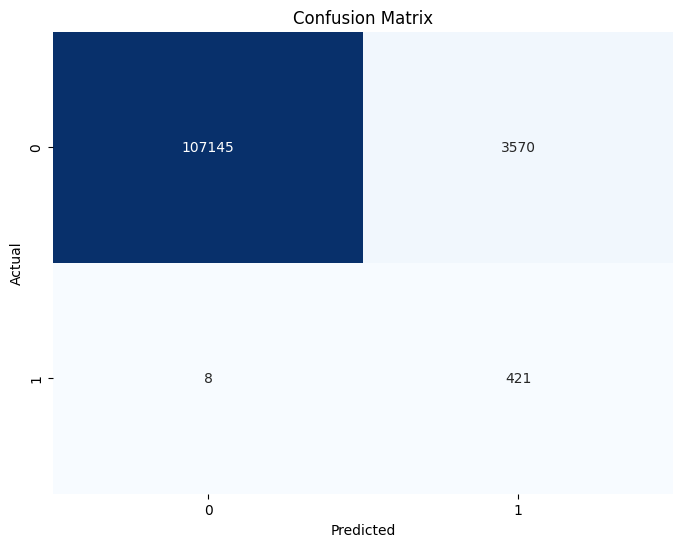

In [ ]:
# Compute metrics
cm = confusion_matrix(y_test, y_pred)
auc_roc = round(roc_auc_score(y_test, y_pred_proba), 5)
acc = round(accuracy_score(y_test, y_pred), 5)
recall = round(recall_score(y_test, y_pred), 5)
precision = round(precision_score(y_test, y_pred), 5)
f1 = round(f1_score(y_test, y_pred), 5)


metrics_dict_ml['XGB: Random Undersampling'] = {'AUC-ROC': auc_roc, 'Accuracy': acc, 'Recall': recall, 'Precision': precision, 'F1 Score': f1}

# Print metrics
print(f"AUC-ROC: {auc_roc}")
print(f"Accuracy: {acc}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")

# Plot ROC Curve
fpr_rus, tpr_rus, thresholds_rus = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rus, tpr_rus, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import pickle

# Save model
with open('/content/drive/MyDrive/Thesis/Models/pickles/rus_xgb.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)

 ### c. LightGBM

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [ ]:
# Select features and target
X_train = rus.drop('is_fraud', axis=1)
y_train = rus['is_fraud']

# Assume the test dataset is already split into features and target
X_test = test.drop('is_fraud', axis=1)
y_test = test['is_fraud']

# Initialize and fit logistic regression model
lgb_model =  LGBMClassifier(objective='binary', metric='auc', verbose=100)
lgb_model.fit(X_train, y_train)

# Predict probabilities on test set
y_pred_proba = lgb_model.predict_proba(X_test)[:, 1]

# Predict on test set
y_pred = lgb_model.predict(X_test)

[LightGBM] [Info] Number of positive: 1716, number of negative: 1716
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.040846
[LightGBM] [Debug] init for col-wise cost 0.000183 seconds, init for row-wise cost 0.000709 seconds
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001652 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Dense Multi-Val Bin
[LightGBM] [Info] Total Bins 948
[LightGBM] [Info] Number of data points in the train set: 3432, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debug]

AUC-ROC: 0.99673
Accuracy: 0.97023
Recall: 0.97669
Precision: 0.11269
F1 Score: 0.20207


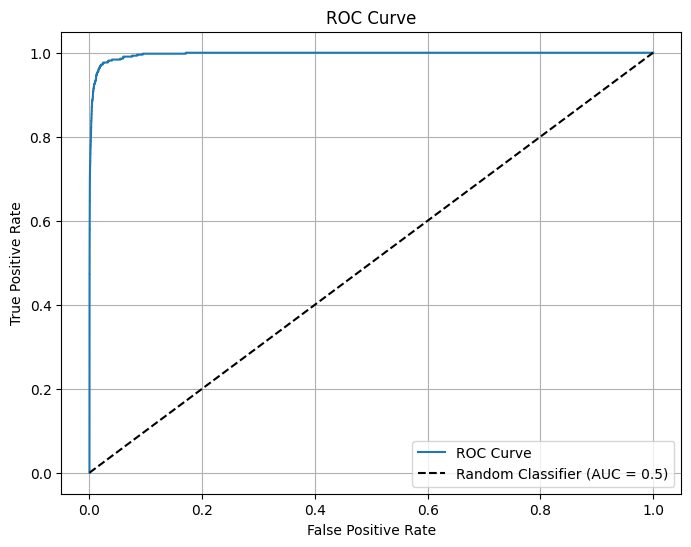

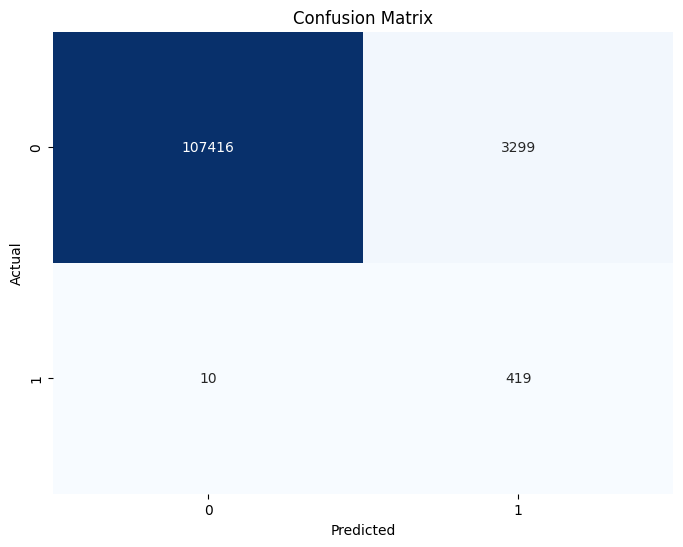

In [ ]:
# Compute metrics
cm = confusion_matrix(y_test, y_pred)
auc_roc = round(roc_auc_score(y_test, y_pred_proba), 5)
acc = round(accuracy_score(y_test, y_pred), 5)
recall = round(recall_score(y_test, y_pred), 5)
precision = round(precision_score(y_test, y_pred), 5)
f1 = round(f1_score(y_test, y_pred), 5)


metrics_dict_ml['LGBM: Random Undersampling'] = {'AUC-ROC': auc_roc, 'Accuracy': acc, 'Recall': recall, 'Precision': precision, 'F1 Score': f1}

# Print metrics
print(f"AUC-ROC: {auc_roc}")
print(f"Accuracy: {acc}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")

# Plot ROC Curve
fpr_rus, tpr_rus, thresholds_rus = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rus, tpr_rus, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import pickle

# Save model
with open('/content/drive/MyDrive/Thesis/Sampling tech nb/rus_lgbm.pkl', 'wb') as file:
    pickle.dump(lgb_model, file)

### d. Ensemble Classifier

In [ ]:
# # Splitting the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# # Initialize the Random Forest classifier
# rf_classifier = RandomForestClassifier()

# # Train the Random Forest classifier on the training data
# rf_classifier.fit(X_train, y_train)

# # Initialize the LightGBM classifier
# lgb_classifier = LGBMClassifier(objective='binary', metric='auc', verbose=100)

# # Train the LightGBM classifier on the training data
# lgb_classifier.fit(X_train, y_train)

In [ ]:
# from sklearn.ensemble import VotingClassifier
# # Combine the two classifiers into an ensemble
# ensemble_model = VotingClassifier(estimators=[
#     ('Random Forest', rf_classifier),
#     ('LightGBM', lgb_classifier)], voting='soft')  # Using soft voting for classifiers that output probabilities

# # Train the ensemble model
# ensemble_model.fit(X_train, y_train)

# # Make predictions using the ensemble model
# y_pred_ensemble = ensemble_model.predict(X_test)

In [ ]:
# # Evaluating the performance of the ensemble model
# accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
# print("Accuracy (Ensemble):", accuracy_ensemble)

# # Generating a classification report for the ensemble
# print("Classification Report (Ensemble):")
# print(classification_report(y_test, y_pred_ensemble, digits=7))



In [ ]:
# # Calculating AUC-ROC for the ensemble
# y_pred_proba_ensemble = ensemble_model.predict_proba(X_test)[:, 1]
# auc_roc_ensemble = roc_auc_score(y_test, y_pred_proba_ensemble)
# print("AUC-ROC (Ensemble):", auc_roc_ensemble)

In [ ]:
# from sklearn.metrics import roc_curve, auc
# import matplotlib.pyplot as plt

# # Compute ROC curve and ROC area for the ensemble
# fpr_ensemble, tpr_ensemble, _ = roc_curve(y_test, y_pred_proba_ensemble)
# roc_auc_ensemble = auc(fpr_ensemble, tpr_ensemble)

# # Plot ROC curve for the ensemble
# plt.figure(figsize=(8, 6))
# plt.plot(fpr_ensemble, tpr_ensemble, color='blue', label='ROC curve (AUC = %0.2f)' % roc_auc_ensemble)
# plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier (AUC = 0.50)')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve (Ensemble)')
# plt.legend(loc="lower right")
# plt.show()

## 2. Tomeklinks

In [ ]:
tkl.head()

,amt,gender,city_pop,Month,Hour,age,job_Agriculture,job_Business,job_Creative,job_Education,...,region_West,distance,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,is_fraud
0,-0.326279,0,-0.290814,-0.257069,-0.118789,1.810280,0,0,0,0,...,0,1.307092,0,1,0,0,0,0,0,0
1,0.785585,1,-0.223335,0.753949,-0.265612,-0.597602,0,0,0,0,...,0,1.162314,0,0,0,0,0,0,1,0
2,-0.162638,0,-0.290618,-0.257069,-0.265612,0.549009,0,1,0,0,...,1,1.256416,0,0,0,0,0,1,0,0
3,-0.434735,0,-0.289709,-0.257069,-1.146551,0.892992,0,0,0,1,...,0,0.833528,0,0,0,0,0,1,0,0
4,-0.378975,0,-0.292369,1.259458,0.468503,2.440915,0,0,0,0,...,0,-0.966156,0,0,0,0,0,0,1,0


#### a. Random Forest

In [ ]:
# Select features and target
X_train = tkl.drop('is_fraud', axis=1)
y_train = tkl['is_fraud']

# Assume the test dataset is already split into features and target
X_test = test.drop('is_fraud', axis=1)
y_test = test['is_fraud']

In [ ]:
# Initialize the Random Forest classifier
rf_model = RandomForestClassifier()

# Train the classifier on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_model.predict(X_test)

y_pred_proba = rf_model.predict_proba(X_test)[:, 1]


AUC-ROC: 0.99673
Accuracy: 0.99852
Recall: 0.62937
Precision: 0.97826
F1 Score: 0.76596


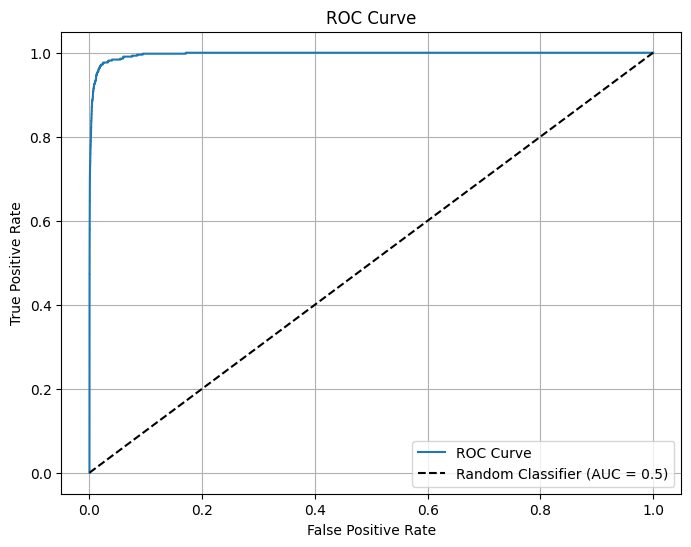

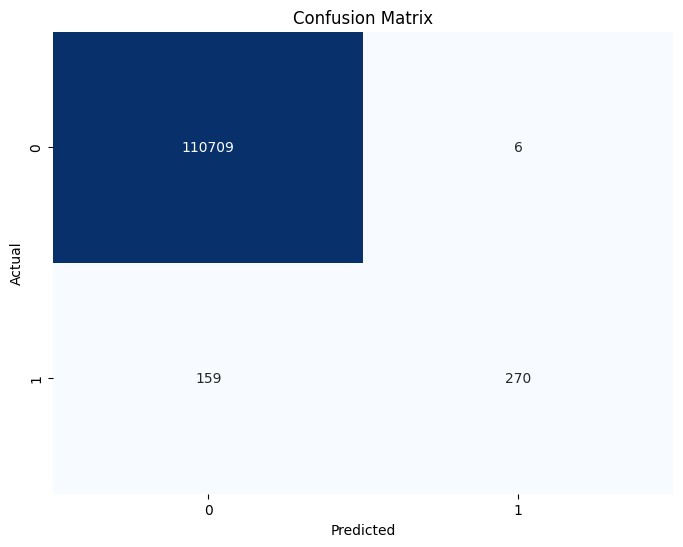

In [ ]:
# Compute metrics
cm = confusion_matrix(y_test, y_pred)
auc_roc = round(roc_auc_score(y_test, y_pred_proba), 5)
acc = round(accuracy_score(y_test, y_pred), 5)
recall = round(recall_score(y_test, y_pred), 5)
precision = round(precision_score(y_test, y_pred), 5)
f1 = round(f1_score(y_test, y_pred), 5)


metrics_dict_ml['RF: TomekLinks'] = {'AUC-ROC': auc_roc, 'Accuracy': acc, 'Recall': recall, 'Precision': precision, 'F1 Score': f1}

# Print metrics
print(f"AUC-ROC: {auc_roc}")
print(f"Accuracy: {acc}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")

# Plot ROC Curve
fpr_rus, tpr_rus, thresholds_rus = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rus, tpr_rus, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import pickle

# Save model
with open('/content/drive/MyDrive/Thesis/Models/pickles/tkl_rf.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

### b. Extreme Gradient Boost (XGBoost)


In [ ]:
from xgboost import XGBClassifier


In [ ]:
# Select features and target
X_train = tkl.drop('is_fraud', axis=1)
y_train = tkl['is_fraud']

# Assume the test dataset is already split into features and target
X_test = test.drop('is_fraud', axis=1)
y_test = test['is_fraud']

# Initialize and fit logistic regression model
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Predict probabilities on test set
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# Predict on test set
y_pred = xgb_model.predict(X_test)

AUC-ROC: 0.99859
Accuracy: 0.99912
Recall: 0.80886
Precision: 0.95592
F1 Score: 0.87626


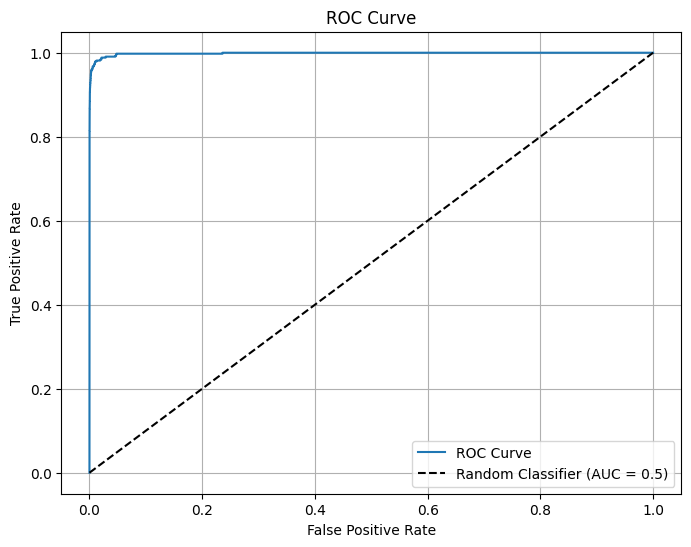

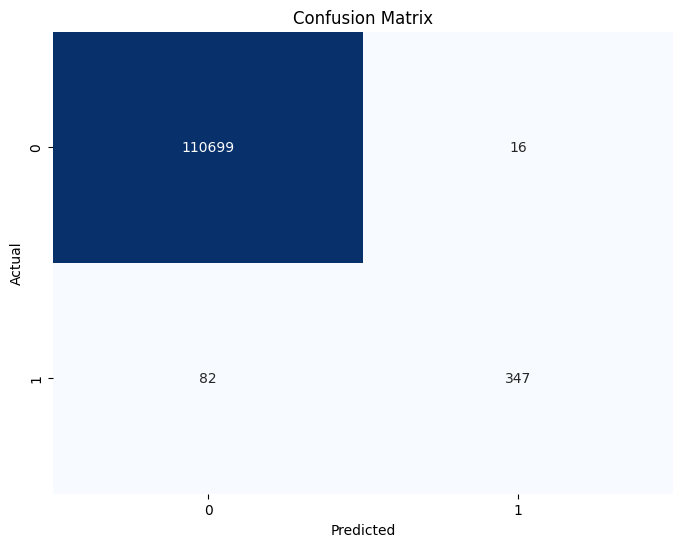

In [ ]:
# Compute metrics
cm = confusion_matrix(y_test, y_pred)
auc_roc = round(roc_auc_score(y_test, y_pred_proba), 5)
acc = round(accuracy_score(y_test, y_pred), 5)
recall = round(recall_score(y_test, y_pred), 5)
precision = round(precision_score(y_test, y_pred), 5)
f1 = round(f1_score(y_test, y_pred), 5)


metrics_dict_ml['XGB: Tomeklinks'] = {'AUC-ROC': auc_roc, 'Accuracy': acc, 'Recall': recall, 'Precision': precision, 'F1 Score': f1}

# Print metrics
print(f"AUC-ROC: {auc_roc}")
print(f"Accuracy: {acc}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")

# Plot ROC Curve
fpr_rus, tpr_rus, thresholds_rus = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rus, tpr_rus, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import pickle

# Save model
with open('/content/drive/MyDrive/Thesis/Models/pickles/tkl_xgb.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)

 ### c. LightGBM

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [ ]:
# Select features and target
X_train = tkl.drop('is_fraud', axis=1)
y_train = tkl['is_fraud']

# Assume the test dataset is already split into features and target
X_test = test.drop('is_fraud', axis=1)
y_test = test['is_fraud']

# Initialize and fit logistic regression model
lgb_model =  LGBMClassifier(objective='binary', metric='auc', verbose=100)
lgb_model.fit(X_train, y_train)

# Predict probabilities on test set
y_pred_proba = lgb_model.predict_proba(X_test)[:, 1]

# Predict on test set
y_pred = lgb_model.predict(X_test)

[LightGBM] [Info] Number of positive: 1716, number of negative: 442622
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.041050
[LightGBM] [Debug] init for col-wise cost 0.000012 seconds, init for row-wise cost 0.058689 seconds
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.029649 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Dense Multi-Val Bin
[LightGBM] [Info] Total Bins 949
[LightGBM] [Info] Number of data points in the train set: 444338, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.003862 -> initscore=-5.552720
[LightGBM] [Info] Start training from score -5.552720
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 11
[LightGBM] [Debug] Trai

AUC-ROC: 0.89471
Accuracy: 0.99718
Recall: 0.69697
Precision: 0.62033
F1 Score: 0.65642


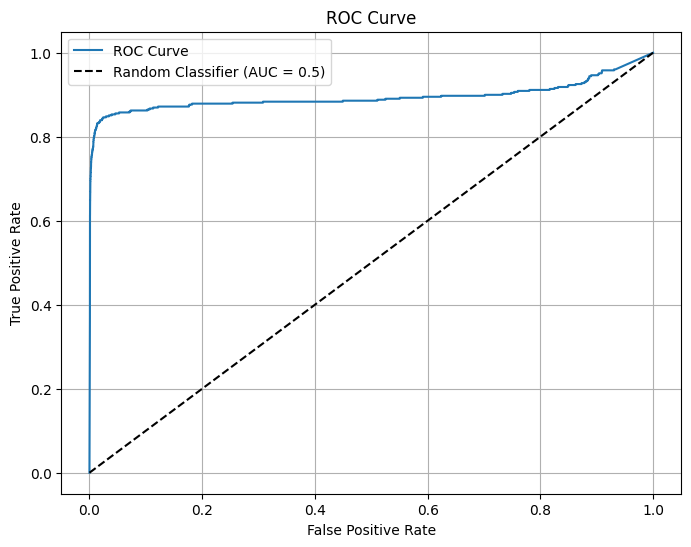

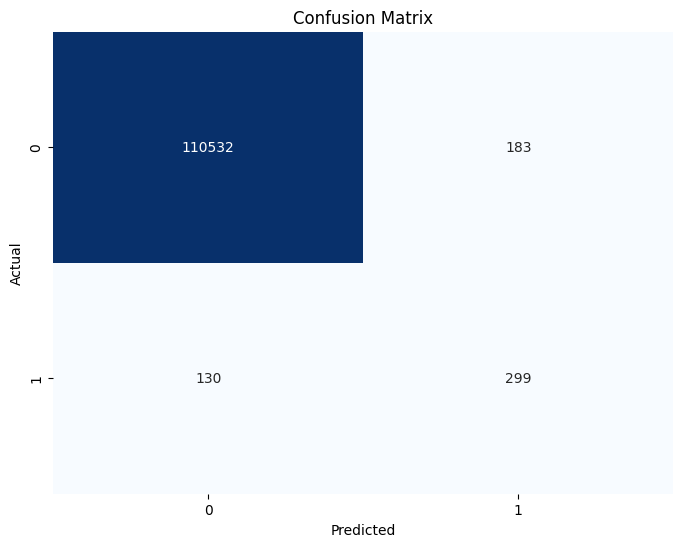

In [ ]:
# Compute metrics
cm = confusion_matrix(y_test, y_pred)
auc_roc = round(roc_auc_score(y_test, y_pred_proba), 5)
acc = round(accuracy_score(y_test, y_pred), 5)
recall = round(recall_score(y_test, y_pred), 5)
precision = round(precision_score(y_test, y_pred), 5)
f1 = round(f1_score(y_test, y_pred), 5)


metrics_dict_ml['LGBM: TomekLinks'] = {'AUC-ROC': auc_roc, 'Accuracy': acc, 'Recall': recall, 'Precision': precision, 'F1 Score': f1}

# Print metrics
print(f"AUC-ROC: {auc_roc}")
print(f"Accuracy: {acc}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")

# Plot ROC Curve
fpr_rus, tpr_rus, thresholds_rus = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rus, tpr_rus, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import pickle

# Save model
with open('/content/drive/MyDrive/Thesis/Models/pickles/tomek_lgbm.pkl', 'wb') as file:
    pickle.dump(lgb_model, file)

### d. Ensemble Model

In [ ]:
# # Splitting the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# # Initialize and train the Random Forest classifier
# rf_classifier = RandomForestClassifier()
# rf_classifier.fit(X_train, y_train)

# # Initialize and train the XGBoost classifier
# xgb_classifier = XGBClassifier()
# xgb_classifier.fit(X_train, y_train)

# # Initialize and train the LightGBM classifier
# lgb_classifier = LGBMClassifier(objective='binary', metric='auc', verbose=100)
# lgb_classifier.fit(X_train, y_train)

In [ ]:
# # Combine the three classifiers into an ensemble
# ensemble_model = VotingClassifier(estimators=[
#     ('Random Forest', rf_classifier),
#     ('XGBoost', xgb_classifier),
#     ('LightGBM', lgb_classifier)], voting='soft')  # Using soft voting for classifiers that output probabilities

# # Train the ensemble model
# ensemble_model.fit(X_train, y_train)

# # Make predictions using the ensemble model
# y_pred_ensemble = ensemble_model.predict(X_test)

In [ ]:
# # Evaluating the performance of the ensemble
# accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
# print("Accuracy (Ensemble):", accuracy_ensemble)

# # Generating a classification report for the ensemble
# print("Classification Report (Ensemble):")
# print(classification_report(y_test, y_pred_ensemble, digits=7))

In [ ]:
# # Calculating AUC-ROC for the ensemble
# y_pred_proba_ensemble = ensemble_model.predict_proba(X_test)[:, 1]
# auc_roc_ensemble = roc_auc_score(y_test, y_pred_proba_ensemble)
# print("AUC-ROC (Ensemble):", auc_roc_ensemble)

# # Generating ROC curve for the ensemble
# fpr_ensemble, tpr_ensemble, _ = roc_curve(y_test, y_pred_proba_ensemble)
# plt.figure(figsize=(8, 6))
# plt.plot(fpr_ensemble, tpr_ensemble, color='blue', label='ROC curve (AUC = %0.2f)' % auc_roc_ensemble)
# plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier (AUC = 0.50)')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve (Ensemble)')
# plt.legend(loc="lower right")
# plt.show()

# OVER SAMPLING TECHNIQUES

## 1. Random OverSampling DF

In [ ]:
ros.head()

,amt,gender,city_pop,Month,Hour,age,job_Agriculture,job_Business,job_Creative,job_Education,...,region_West,distance,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,is_fraud
0,-0.326279,0,-0.290814,-0.257069,-0.118789,1.810280,0,0,0,0,...,0,1.307092,0,1,0,0,0,0,0,0
1,0.785585,1,-0.223335,0.753949,-0.265612,-0.597602,0,0,0,0,...,0,1.162314,0,0,0,0,0,0,1,0
2,-0.162638,0,-0.290618,-0.257069,-0.265612,0.549009,0,1,0,0,...,1,1.256416,0,0,0,0,0,1,0,0
3,-0.434735,0,-0.289709,-0.257069,-1.146551,0.892992,0,0,0,1,...,0,0.833528,0,0,0,0,0,1,0,0
4,-0.378975,0,-0.292369,1.259458,0.468503,2.440915,0,0,0,0,...,0,-0.966156,0,0,0,0,0,0,1,0


#### a. Random Forest

In [ ]:
# Select features and target
X_train = ros.drop('is_fraud', axis=1)
y_train = ros['is_fraud']

# Assume the test dataset is already split into features and target
X_test = test.drop('is_fraud', axis=1)
y_test = test['is_fraud']

In [ ]:
# Initialize the Random Forest classifier
rf_model = RandomForestClassifier()

# Train the classifier on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_model.predict(X_test)

y_pred_proba = rf_model.predict_proba(X_test)[:, 1]


AUC-ROC: 0.89471
Accuracy: 0.99874
Recall: 0.69697
Precision: 0.96764
F1 Score: 0.8103


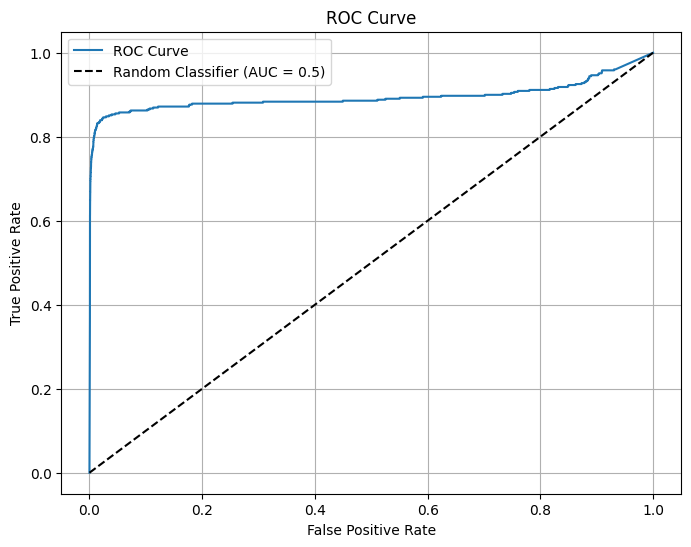

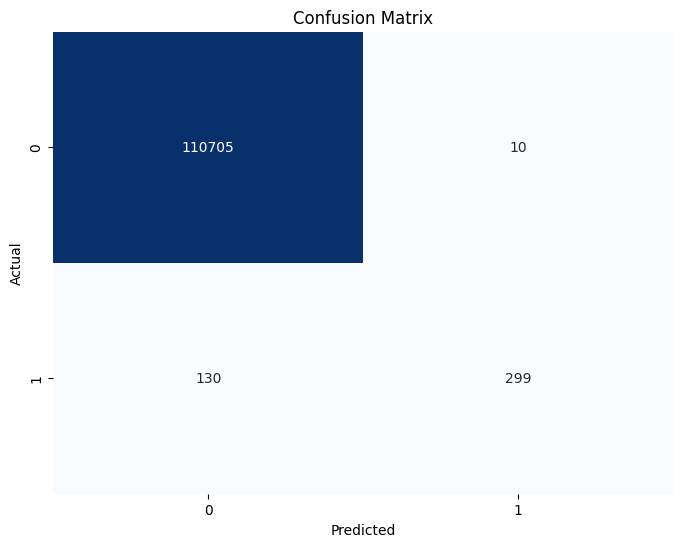

In [ ]:
# Compute metrics
cm = confusion_matrix(y_test, y_pred)
auc_roc = round(roc_auc_score(y_test, y_pred_proba), 5)
acc = round(accuracy_score(y_test, y_pred), 5)
recall = round(recall_score(y_test, y_pred), 5)
precision = round(precision_score(y_test, y_pred), 5)
f1 = round(f1_score(y_test, y_pred), 5)


metrics_dict_ml['RF: Random Oversampling'] = {'AUC-ROC': auc_roc, 'Accuracy': acc, 'Recall': recall, 'Precision': precision, 'F1 Score': f1}

# Print metrics
print(f"AUC-ROC: {auc_roc}")
print(f"Accuracy: {acc}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")

# Plot ROC Curve
fpr_rus, tpr_rus, thresholds_rus = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rus, tpr_rus, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import pickle

# Save model
with open('/content/drive/MyDrive/Thesis/Models/pickles/ros_rf.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

### b. Extreme Gradient Boost (XGBoost)


In [ ]:
from xgboost import XGBClassifier


In [ ]:
# Select features and target
X_train = ros.drop('is_fraud', axis=1)
y_train = ros['is_fraud']

# Assume the test dataset is already split into features and target
X_test = test.drop('is_fraud', axis=1)
y_test = test['is_fraud']

# Initialize and fit logistic regression model
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Predict probabilities on test set
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# Predict on test set
y_pred = xgb_model.predict(X_test)

AUC-ROC: 0.99845
Accuracy: 0.9976
Recall: 0.92308
Precision: 0.62857
F1 Score: 0.74788


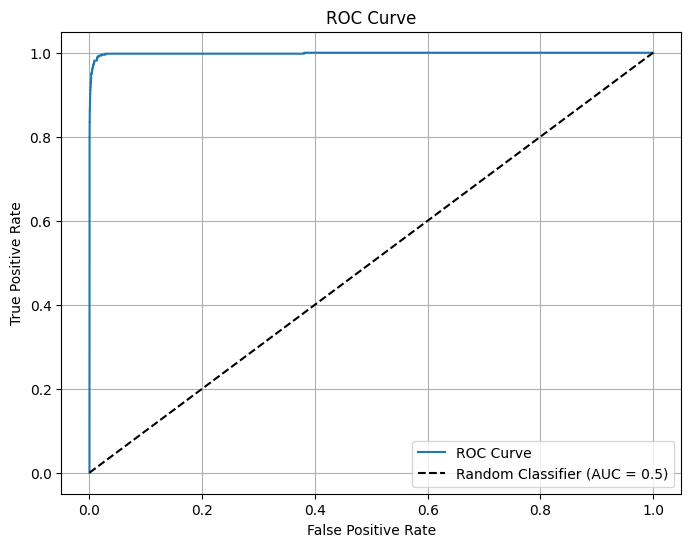

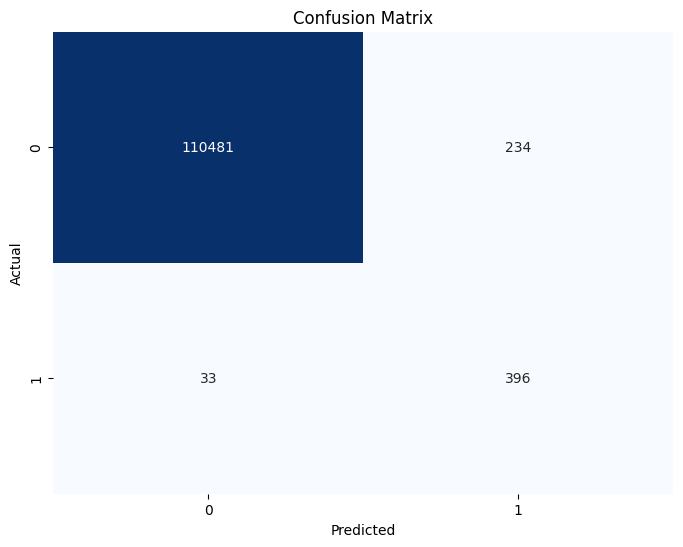

In [ ]:
# Compute metrics
cm = confusion_matrix(y_test, y_pred)
auc_roc = round(roc_auc_score(y_test, y_pred_proba), 5)
acc = round(accuracy_score(y_test, y_pred), 5)
recall = round(recall_score(y_test, y_pred), 5)
precision = round(precision_score(y_test, y_pred), 5)
f1 = round(f1_score(y_test, y_pred), 5)


metrics_dict_ml['XGB: Random Oversampling'] = {'AUC-ROC': auc_roc, 'Accuracy': acc, 'Recall': recall, 'Precision': precision, 'F1 Score': f1}

# Print metrics
print(f"AUC-ROC: {auc_roc}")
print(f"Accuracy: {acc}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")

# Plot ROC Curve
fpr_rus, tpr_rus, thresholds_rus = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rus, tpr_rus, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import pickle

# Save model
with open('/content/drive/MyDrive/Thesis/Models/pickles/ros_xgb.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)

 ### c. LightGBM

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [ ]:
# Select features and target
X_train = ros.drop('is_fraud', axis=1)
y_train = ros['is_fraud']

# Assume the test dataset is already split into features and target
X_test = test.drop('is_fraud', axis=1)
y_test = test['is_fraud']

# Initialize and fit logistic regression model
lgb_model =  LGBMClassifier(objective='binary', metric='auc', verbose=100)
lgb_model.fit(X_train, y_train)

# Predict probabilities on test set
y_pred_proba = lgb_model.predict_proba(X_test)[:, 1]

# Predict on test set
y_pred = lgb_model.predict(X_test)

[LightGBM] [Info] Number of positive: 442859, number of negative: 442859
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.041288
[LightGBM] [Debug] init for col-wise cost 0.000013 seconds, init for row-wise cost 0.134187 seconds
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.271634 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 885718, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and de

AUC-ROC: 0.99824
Accuracy: 0.99162
Recall: 0.95804
Precision: 0.31042
F1 Score: 0.46891


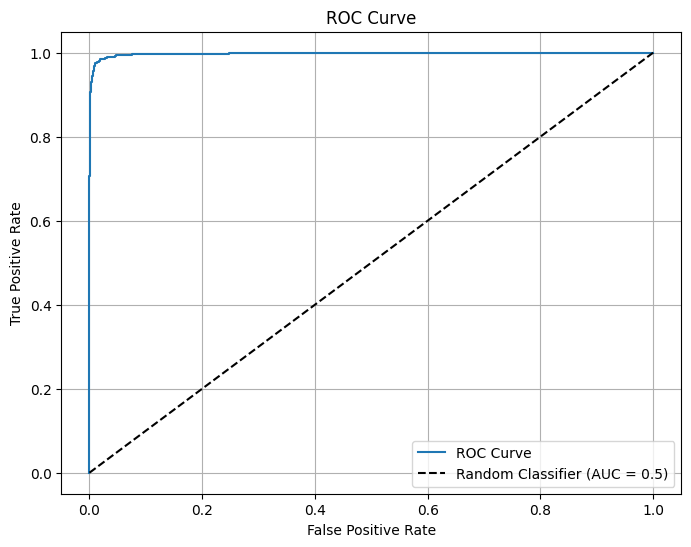

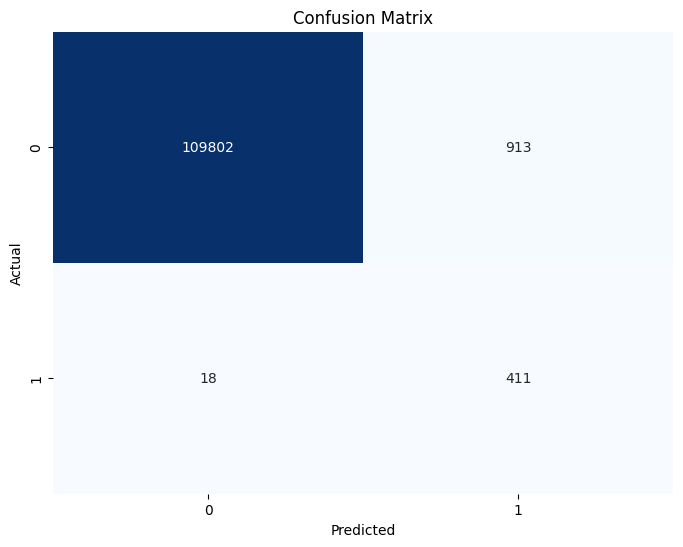

In [ ]:
# Compute metrics
cm = confusion_matrix(y_test, y_pred)
auc_roc = round(roc_auc_score(y_test, y_pred_proba), 5)
acc = round(accuracy_score(y_test, y_pred), 5)
recall = round(recall_score(y_test, y_pred), 5)
precision = round(precision_score(y_test, y_pred), 5)
f1 = round(f1_score(y_test, y_pred), 5)


metrics_dict_ml['LGBM: Random Oversampling'] = {'AUC-ROC': auc_roc, 'Accuracy': acc, 'Recall': recall, 'Precision': precision, 'F1 Score': f1}

# Print metrics
print(f"AUC-ROC: {auc_roc}")
print(f"Accuracy: {acc}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")

# Plot ROC Curve
fpr_rus, tpr_rus, thresholds_rus = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rus, tpr_rus, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import pickle

# Save model
with open('/content/drive/MyDrive/Thesis/Models/pickles/ros_lgbm.pkl', 'wb') as file:
    pickle.dump(lgb_model, file)

### d. Ensemble model

In [ ]:
# # Splitting the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# # Initialize and train the Random Forest classifier
# rf_classifier = RandomForestClassifier()
# rf_classifier.fit(X_train, y_train)

# # Initialize and train the LightGBM classifier
# lgb_classifier = lgb.LGBMClassifier(objective='binary', metric='auc', verbose=100)
# lgb_classifier.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 442975, number of negative: 442743
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.000000
[LightGBM] [Debug] init for col-wise cost 0.000009 seconds, init for row-wise cost 0.073702 seconds
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.035918 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Dense Multi-Val Bin
[LightGBM] [Info] Total Bins 1937
[LightGBM] [Info] Number of data points in the train set: 885718, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500131 -> initscore=0.000524
[LightGBM] [Info] Start training from score 0.000524
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 8
[LightGBM] [Debug] Train

LGBMClassifier(metric='auc', objective='binary', verbose=100)

In [ ]:
# # Combine the two classifiers into an ensemble
# ensemble_model = VotingClassifier(estimators=[
#     ('Random Forest', rf_classifier),
#     ('LightGBM', lgb_classifier)], voting='soft')  # Using soft voting for classifiers that output probabilities

# # Train the ensemble model
# ensemble_model.fit(X_train, y_train)

# # Make predictions using the ensemble model
# y_pred_ensemble = ensemble_model.predict(X_test)

NameError: name 'VotingClassifier' is not defined

In [ ]:
# # Evaluating the performance of the ensemble
# accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
# print("Accuracy (Ensemble):", accuracy_ensemble)

# # Generating a classification report for the ensemble
# print("Classification Report (Ensemble):")
# print(classification_report(y_test, y_pred_ensemble, digits=7))


In [ ]:
# #Calculating AUC-ROC for the ensemble
# y_pred_proba_ensemble = ensemble_model.predict_proba(X_test)[:, 1]
# auc_roc_ensemble = roc_auc_score(y_test, y_pred_proba_ensemble)
# print("AUC-ROC (Ensemble):", auc_roc_ensemble)

# # Generating ROC curve for the ensemble
# fpr_ensemble, tpr_ensemble, _ = roc_curve(y_test, y_pred_proba_ensemble)
# plt.figure(figsize=(8, 6))
# plt.plot(fpr_ensemble, tpr_ensemble, color='blue', label='ROC curve (AUC = %0.2f)' % auc_roc_ensemble)
# plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier (AUC = 0.50)')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve (Ensemble)')
# plt.legend(loc="lower right")
# plt.show()

## 2. SMOTE

In [ ]:
smote.head()

,amt,gender,city_pop,Month,Hour,age,job_Agriculture,job_Business,job_Creative,job_Education,...,region_West,distance,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,is_fraud
0,-0.326279,0,-0.290814,-0.257069,-0.118789,1.810280,0,0,0,0,...,0,1.307092,0,1,0,0,0,0,0,0
1,0.785585,1,-0.223335,0.753949,-0.265612,-0.597602,0,0,0,0,...,0,1.162314,0,0,0,0,0,0,1,0
2,-0.162638,0,-0.290618,-0.257069,-0.265612,0.549009,0,1,0,0,...,1,1.256416,0,0,0,0,0,1,0,0
3,-0.434735,0,-0.289709,-0.257069,-1.146551,0.892992,0,0,0,1,...,0,0.833528,0,0,0,0,0,1,0,0
4,-0.378975,0,-0.292369,1.259458,0.468503,2.440915,0,0,0,0,...,0,-0.966156,0,0,0,0,0,0,1,0


#### a. Random Forest

In [ ]:
# Select features and target
X_train = smote.drop('is_fraud', axis=1)
y_train = smote['is_fraud']

# Assume the test dataset is already split into features and target
X_test = test.drop('is_fraud', axis=1)
y_test = test['is_fraud']

In [ ]:
# Initialize the Random Forest classifier
rf_model = RandomForestClassifier()

# Train the classifier on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_model.predict(X_test)

y_pred_proba = rf_model.predict_proba(X_test)[:, 1]


AUC-ROC: 0.99592
Accuracy: 0.9987
Recall: 0.72028
Precision: 0.92793
F1 Score: 0.81102


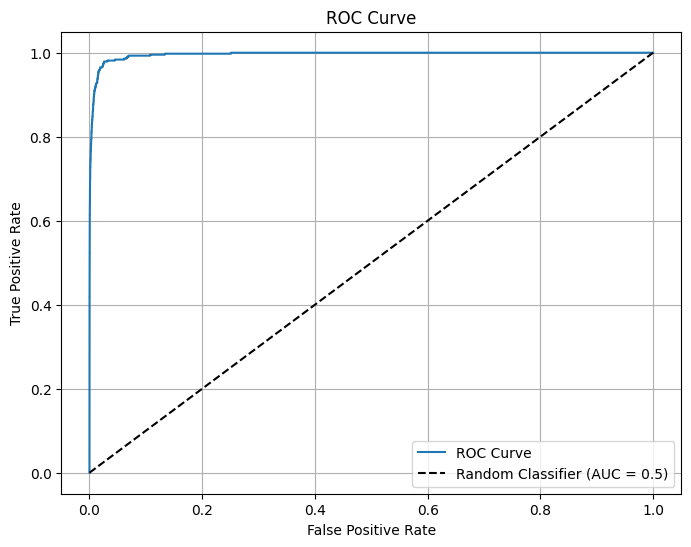

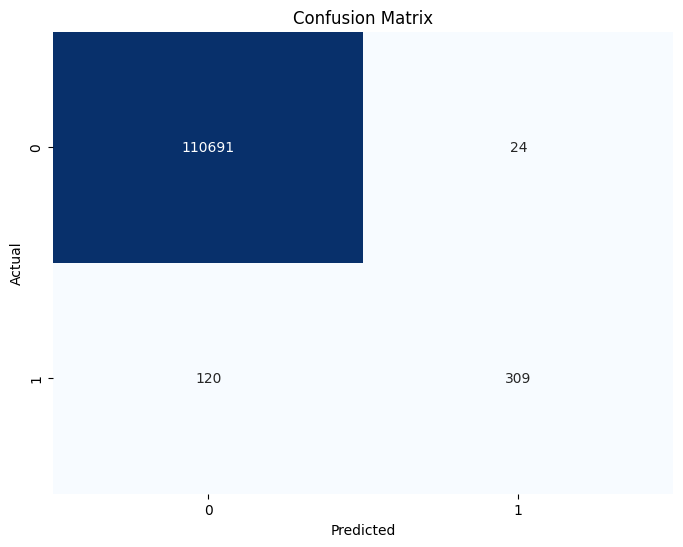

In [ ]:
# Compute metrics
cm = confusion_matrix(y_test, y_pred)
auc_roc = round(roc_auc_score(y_test, y_pred_proba), 5)
acc = round(accuracy_score(y_test, y_pred), 5)
recall = round(recall_score(y_test, y_pred), 5)
precision = round(precision_score(y_test, y_pred), 5)
f1 = round(f1_score(y_test, y_pred), 5)


metrics_dict_ml['RF: Smote'] = {'AUC-ROC': auc_roc, 'Accuracy': acc, 'Recall': recall, 'Precision': precision, 'F1 Score': f1}

# Print metrics
print(f"AUC-ROC: {auc_roc}")
print(f"Accuracy: {acc}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")

# Plot ROC Curve
fpr_rus, tpr_rus, thresholds_rus = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rus, tpr_rus, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import pickle

# Save model
with open('/content/drive/MyDrive/Thesis/Models/pickles/smote_rf.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

### b. Extreme Gradient Boost (XGBoost)


In [ ]:
from xgboost import XGBClassifier


In [ ]:
# Select features and target
X_train = smote.drop('is_fraud', axis=1)
y_train = smote['is_fraud']

# Assume the test dataset is already split into features and target
X_test = test.drop('is_fraud', axis=1)
y_test = test['is_fraud']

# Initialize and fit logistic regression model
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Predict probabilities on test set
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# Predict on test set
y_pred = xgb_model.predict(X_test)

AUC-ROC: 0.99734
Accuracy: 0.99841
Recall: 0.86247
Precision: 0.7582
F1 Score: 0.80698


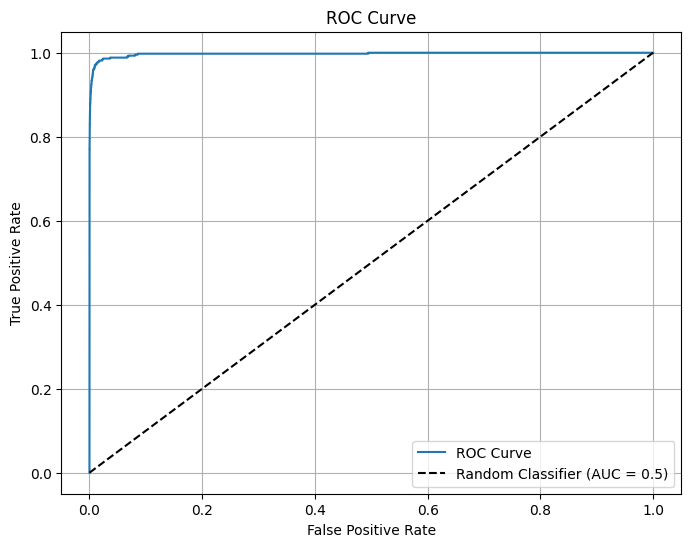

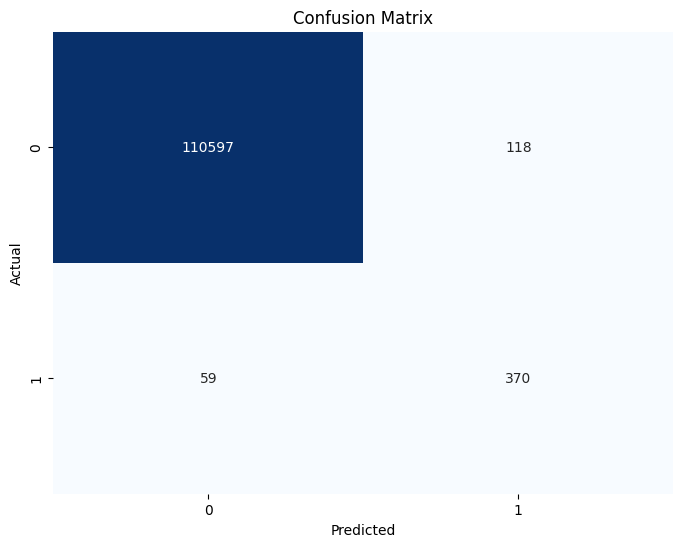

In [ ]:
# Compute metrics
cm = confusion_matrix(y_test, y_pred)
auc_roc = round(roc_auc_score(y_test, y_pred_proba), 5)
acc = round(accuracy_score(y_test, y_pred), 5)
recall = round(recall_score(y_test, y_pred), 5)
precision = round(precision_score(y_test, y_pred), 5)
f1 = round(f1_score(y_test, y_pred), 5)


metrics_dict_ml['XGB: Smote'] = {'AUC-ROC': auc_roc, 'Accuracy': acc, 'Recall': recall, 'Precision': precision, 'F1 Score': f1}

# Print metrics
print(f"AUC-ROC: {auc_roc}")
print(f"Accuracy: {acc}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")

# Plot ROC Curve
fpr_rus, tpr_rus, thresholds_rus = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rus, tpr_rus, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import pickle

# Save model
with open('/content/drive/MyDrive/Thesis/Models/pickles/smote_xgb.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)

 ### c. LightGBM

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [ ]:
# Select features and target
X_train = smote.drop('is_fraud', axis=1)
y_train = smote['is_fraud']

# Assume the test dataset is already split into features and target
X_test = test.drop('is_fraud', axis=1)
y_test = test['is_fraud']

# Initialize and fit logistic regression model
lgb_model =  LGBMClassifier(objective='binary', metric='auc', verbose=100)
lgb_model.fit(X_train, y_train)

# Predict probabilities on test set
y_pred_proba = lgb_model.predict_proba(X_test)[:, 1]

# Predict on test set
y_pred = lgb_model.predict(X_test)

[LightGBM] [Info] Number of positive: 442859, number of negative: 442859
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.099561
[LightGBM] [Debug] init for col-wise cost 0.000013 seconds, init for row-wise cost 0.134192 seconds
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.067155 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Dense Multi-Val Bin
[LightGBM] [Info] Total Bins 1600
[LightGBM] [Info] Number of data points in the train set: 885718, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 11
[LightGB

AUC-ROC: 0.99694
Accuracy: 0.99665
Recall: 0.87646
Precision: 0.54101
F1 Score: 0.66904


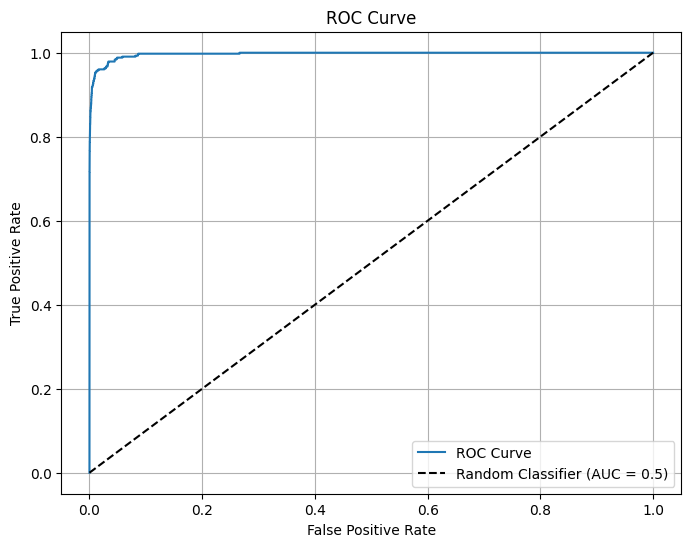

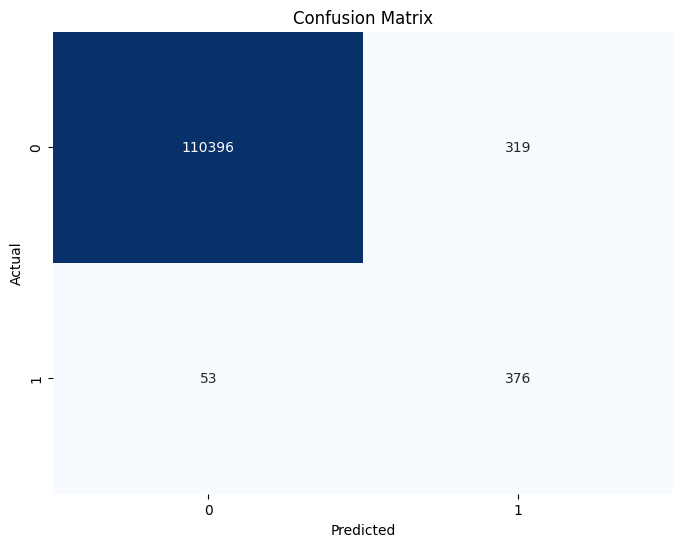

In [ ]:
# Compute metrics
cm = confusion_matrix(y_test, y_pred)
auc_roc = round(roc_auc_score(y_test, y_pred_proba), 5)
acc = round(accuracy_score(y_test, y_pred), 5)
recall = round(recall_score(y_test, y_pred), 5)
precision = round(precision_score(y_test, y_pred), 5)
f1 = round(f1_score(y_test, y_pred), 5)


metrics_dict_ml['LGBM: Smote'] = {'AUC-ROC': auc_roc, 'Accuracy': acc, 'Recall': recall, 'Precision': precision, 'F1 Score': f1}

# Print metrics
print(f"AUC-ROC: {auc_roc}")
print(f"Accuracy: {acc}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")

# Plot ROC Curve
fpr_rus, tpr_rus, thresholds_rus = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rus, tpr_rus, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import pickle

# Save model
with open('/content/drive/MyDrive/Thesis/Models/pickles/smote_lgbm.pkl', 'wb') as file:
    pickle.dump(lgb_model, file)

### d. Ensemble Model

In [ ]:
# # Splitting the data into features (X) and labels (y)
# X = smotedf.drop('Class', axis=1)
# y = smotedf['Class']

# # Splitting the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# # Initialize and train the Random Forest classifier
# rf_classifier = RandomForestClassifier()
# rf_classifier.fit(X_train, y_train)

# # Initialize and train the LightGBM classifier
# lgb_classifier = lgb.LGBMClassifier(objective='binary', metric='auc', verbose=100)
# lgb_classifier.fit(X_train, y_train)

In [ ]:
# from sklearn.ensemble import  VotingClassifier
# # Combine the two classifiers into an ensemble
# ensemble_model = VotingClassifier(estimators=[
#     ('Random Forest', rf_classifier),
#     ('LightGBM', lgb_classifier)], voting='soft')  # Using soft voting for classifiers that output probabilities

# # Train the ensemble model
# ensemble_model.fit(X_train, y_train)

# # Make predictions using the ensemble model
# y_pred_ensemble = ensemble_model.predict(X_test)

In [ ]:
# # Evaluating the performance of the ensemble
# accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
# print("Accuracy (Ensemble):", accuracy_ensemble)

# # Generating a classification report for the ensemble
# print("Classification Report (Ensemble):")
# print(classification_report(y_test, y_pred_ensemble, digits=7))


In [ ]:
# # Calculating AUC-ROC for the ensemble
# y_pred_proba_ensemble = ensemble_model.predict_proba(X_test)[:, 1]
# auc_roc_ensemble = roc_auc_score(y_test, y_pred_proba_ensemble)
# print("AUC-ROC (Ensemble):", auc_roc_ensemble)

# # Generating ROC curve for the ensemble
# fpr_ensemble, tpr_ensemble, _ = roc_curve(y_test, y_pred_proba_ensemble)
# plt.figure(figsize=(8, 6))
# plt.plot(fpr_ensemble, tpr_ensemble, color='blue', label='ROC curve (AUC = %0.2f)' % auc_roc_ensemble)
# plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier (AUC = 0.50)')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve (Ensemble)')
# plt.legend(loc="lower right")
# plt.show()


# Oversampling followed by Undersampling

## 1. Smote + Tomek (SmoteTomek)

In [ ]:
smtk.head()

,amt,gender,city_pop,Month,Hour,age,job_Agriculture,job_Business,job_Creative,job_Education,...,region_West,distance,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,is_fraud
0,-0.326279,0,-0.290814,-0.257069,-0.118789,1.810280,0,0,0,0,...,0,1.307092,0,1,0,0,0,0,0,0
1,0.785585,1,-0.223335,0.753949,-0.265612,-0.597602,0,0,0,0,...,0,1.162314,0,0,0,0,0,0,1,0
2,-0.162638,0,-0.290618,-0.257069,-0.265612,0.549009,0,1,0,0,...,1,1.256416,0,0,0,0,0,1,0,0
3,-0.434735,0,-0.289709,-0.257069,-1.146551,0.892992,0,0,0,1,...,0,0.833528,0,0,0,0,0,1,0,0
4,-0.378975,0,-0.292369,1.259458,0.468503,2.440915,0,0,0,0,...,0,-0.966156,0,0,0,0,0,0,1,0


#### a. Random Forest

In [ ]:
# Select features and target
X_train = smtk.drop('is_fraud', axis=1)
y_train = smtk['is_fraud']

# Assume the test dataset is already split into features and target
X_test = test.drop('is_fraud', axis=1)
y_test = test['is_fraud']

In [ ]:
# Initialize the Random Forest classifier
rf_model = RandomForestClassifier()

# Train the classifier on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_model.predict(X_test)

y_pred_proba = rf_model.predict_proba(X_test)[:, 1]


AUC-ROC: 0.99694
Accuracy: 0.99865
Recall: 0.71329
Precision: 0.91892
F1 Score: 0.80315


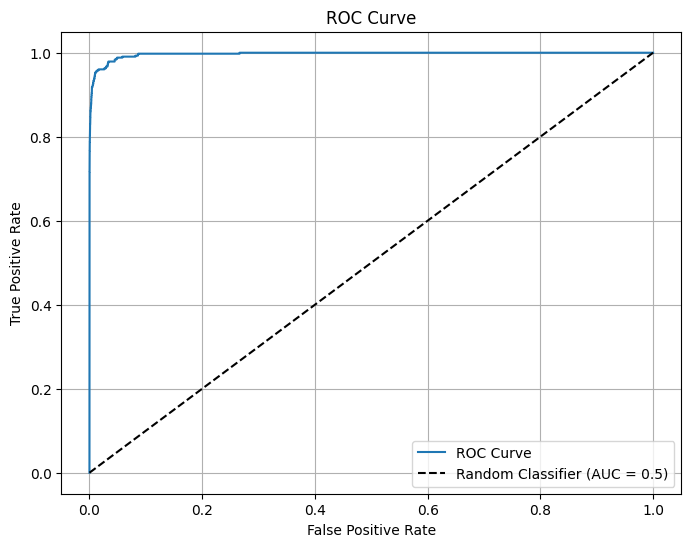

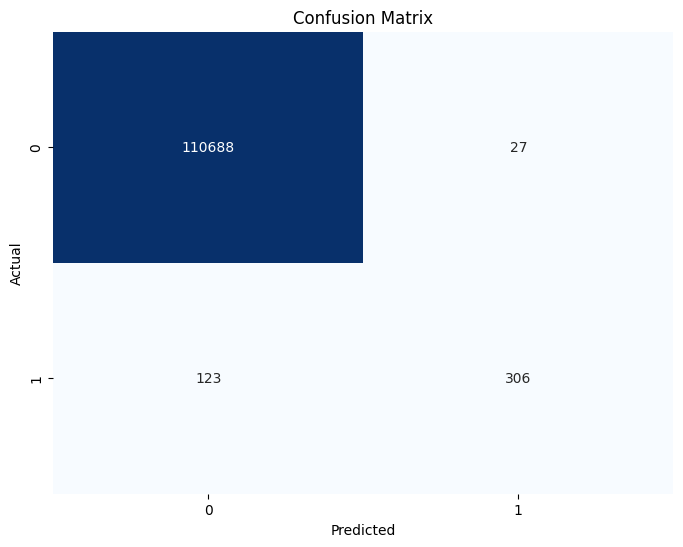

In [ ]:
# Compute metrics
cm = confusion_matrix(y_test, y_pred)
auc_roc = round(roc_auc_score(y_test, y_pred_proba), 5)
acc = round(accuracy_score(y_test, y_pred), 5)
recall = round(recall_score(y_test, y_pred), 5)
precision = round(precision_score(y_test, y_pred), 5)
f1 = round(f1_score(y_test, y_pred), 5)


metrics_dict_ml['RF: Smote Tomek'] = {'AUC-ROC': auc_roc, 'Accuracy': acc, 'Recall': recall, 'Precision': precision, 'F1 Score': f1}

# Print metrics
print(f"AUC-ROC: {auc_roc}")
print(f"Accuracy: {acc}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")

# Plot ROC Curve
fpr_rus, tpr_rus, thresholds_rus = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rus, tpr_rus, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import pickle

# Save model
with open('/content/drive/MyDrive/Thesis/Models/pickles/smtk_rf.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

### b. Extreme Gradient Boost (XGBoost)


In [ ]:
from xgboost import XGBClassifier


In [ ]:
# Select features and target
X_train = smtk.drop('is_fraud', axis=1)
y_train = smtk['is_fraud']

# Assume the test dataset is already split into features and target
X_test = test.drop('is_fraud', axis=1)
y_test = test['is_fraud']

# Initialize and fit logistic regression model
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Predict probabilities on test set
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# Predict on test set
y_pred = xgb_model.predict(X_test)

AUC-ROC: 0.99734
Accuracy: 0.99841
Recall: 0.86247
Precision: 0.7582
F1 Score: 0.80698


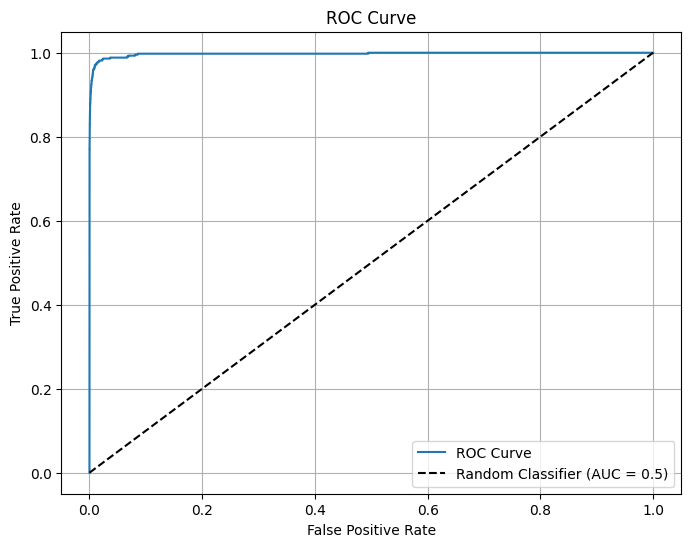

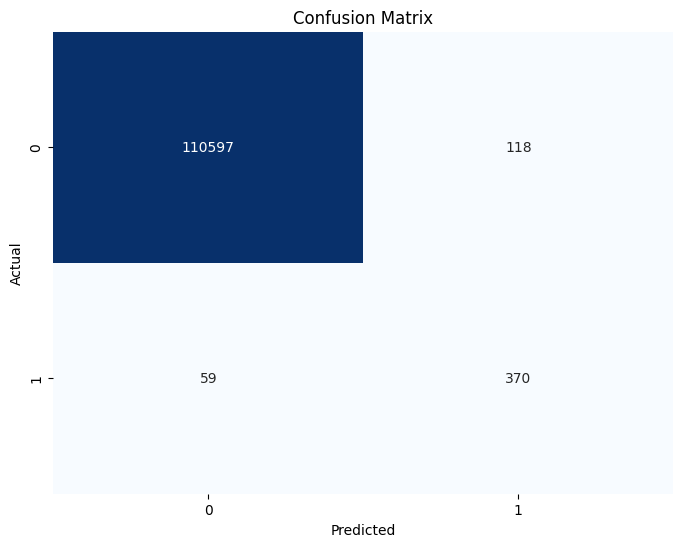

In [ ]:
# Compute metrics
cm = confusion_matrix(y_test, y_pred)
auc_roc = round(roc_auc_score(y_test, y_pred_proba), 5)
acc = round(accuracy_score(y_test, y_pred), 5)
recall = round(recall_score(y_test, y_pred), 5)
precision = round(precision_score(y_test, y_pred), 5)
f1 = round(f1_score(y_test, y_pred), 5)


metrics_dict_ml['XGB: Smote Tomek'] = {'AUC-ROC': auc_roc, 'Accuracy': acc, 'Recall': recall, 'Precision': precision, 'F1 Score': f1}

# Print metrics
print(f"AUC-ROC: {auc_roc}")
print(f"Accuracy: {acc}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")

# Plot ROC Curve
fpr_rus, tpr_rus, thresholds_rus = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rus, tpr_rus, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import pickle

# Save model
with open('/content/drive/MyDrive/Thesis/Models/pickles/smtk_xgb.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)

 ### c. LightGBM

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [ ]:
# Select features and target
X_train = smtk.drop('is_fraud', axis=1)
y_train = smtk['is_fraud']

# Assume the test dataset is already split into features and target
X_test = test.drop('is_fraud', axis=1)
y_test = test['is_fraud']

# Initialize and fit logistic regression model
lgb_model =  LGBMClassifier(objective='binary', metric='auc', verbose=100)
lgb_model.fit(X_train, y_train)

# Predict probabilities on test set
y_pred_proba = lgb_model.predict_proba(X_test)[:, 1]

# Predict on test set
y_pred = lgb_model.predict(X_test)

[LightGBM] [Info] Number of positive: 442859, number of negative: 442859
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.099561
[LightGBM] [Debug] init for col-wise cost 0.000017 seconds, init for row-wise cost 0.126591 seconds
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.060600 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Dense Multi-Val Bin
[LightGBM] [Info] Total Bins 1600
[LightGBM] [Info] Number of data points in the train set: 885718, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 11
[LightGB

AUC-ROC: 0.99694
Accuracy: 0.99665
Recall: 0.87646
Precision: 0.54101
F1 Score: 0.66904


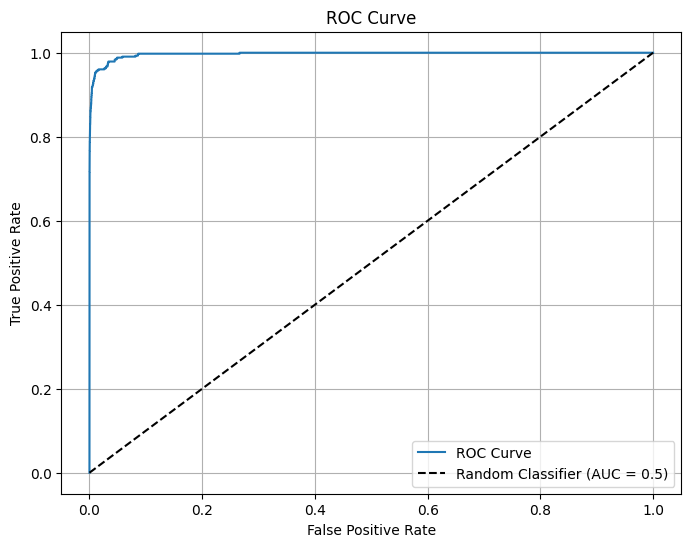

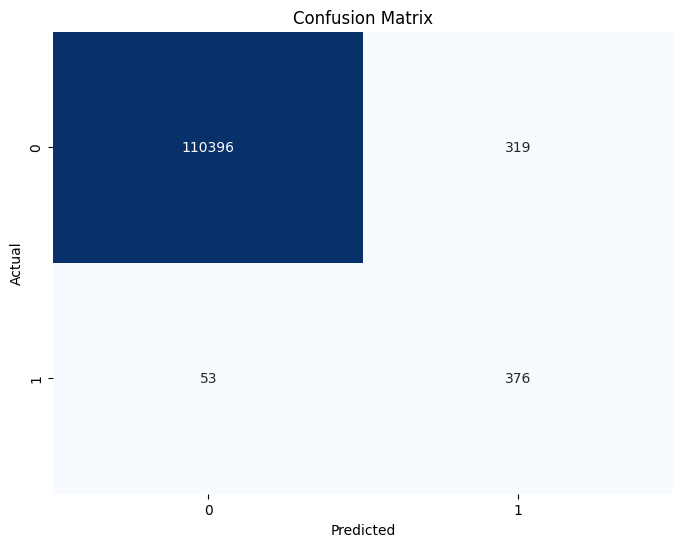

In [ ]:
# Compute metrics
cm = confusion_matrix(y_test, y_pred)
auc_roc = round(roc_auc_score(y_test, y_pred_proba), 5)
acc = round(accuracy_score(y_test, y_pred), 5)
recall = round(recall_score(y_test, y_pred), 5)
precision = round(precision_score(y_test, y_pred), 5)
f1 = round(f1_score(y_test, y_pred), 5)


metrics_dict_ml['LGBM: Smote Tomek'] = {'AUC-ROC': auc_roc, 'Accuracy': acc, 'Recall': recall, 'Precision': precision, 'F1 Score': f1}

# Print metrics
print(f"AUC-ROC: {auc_roc}")
print(f"Accuracy: {acc}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")

# Plot ROC Curve
fpr_rus, tpr_rus, thresholds_rus = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rus, tpr_rus, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import pickle

# Save model
with open('/content/drive/MyDrive/Thesis/Models/pickles/smtk_lgbm.pkl', 'wb') as file:
    pickle.dump(lgb_model, file)

### d. Ensemble Models

In [ ]:
# # Splitting the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# # Initialize and train the Random Forest classifier
# rf_classifier = RandomForestClassifier()
# rf_classifier.fit(X_train, y_train)

# # Initialize and train the LightGBM classifier
# lgb_classifier = lgb.LGBMClassifier(objective='binary', metric='auc', verbose=100)
# lgb_classifier.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 443281, number of negative: 442437
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.000000
[LightGBM] [Debug] init for col-wise cost 0.000011 seconds, init for row-wise cost 0.080242 seconds
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.114661 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3305
[LightGBM] [Info] Number of data points in the train set: 885718, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500476 -> initscore=0.001906
[LightGBM] [Info] Start training from score 0.001906
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[Li

LGBMClassifier(metric='auc', objective='binary', verbose=100)

In [ ]:
# from sklearn.ensemble import VotingClassifier
# # Combine the two classifiers into an ensemble
# ensemble_model = VotingClassifier(estimators=[
#     ('Random Forest', rf_classifier),
#     ('LightGBM', lgb_classifier)], voting='soft')  # Using soft voting for classifiers that output probabilities

# # Train the ensemble model
# ensemble_model.fit(X_train, y_train)

# # Make predictions using the ensemble model
# y_pred_ensemble = ensemble_model.predict(X_test)


KeyboardInterrupt: 

In [ ]:
# # Evaluating the performance of the ensemble
# accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
# print("Accuracy (Ensemble):", accuracy_ensemble)

# # Generating a classification report for the ensemble
# print("Classification Report (Ensemble):")
# print(classification_report(y_test, y_pred_ensemble, digits=5))



In [ ]:
# # Calculating AUC-ROC for the ensemble
# y_pred_proba_ensemble = ensemble_model.predict_proba(X_test)[:, 1]
# auc_roc_ensemble = roc_auc_score(y_test, y_pred_proba_ensemble)
# print("AUC-ROC (Ensemble):", auc_roc_ensemble)

# # Generating ROC curve for the ensemble
# fpr_ensemble, tpr_ensemble, _ = roc_curve(y_test, y_pred_proba_ensemble)
# plt.figure(figsize=(8, 6))
# plt.plot(fpr_ensemble, tpr_ensemble, color='blue', label='ROC curve (AUC = %0.2f)' % auc_roc_ensemble)
# plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier (AUC = 0.50)')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve (Ensemble)')
# plt.legend(loc="lower right")
# plt.show()

## 2. Smote + ENN (Smoteen)

In [ ]:
smoteen.head()

,amt,gender,city_pop,Month,Hour,age,job_Agriculture,job_Business,job_Creative,job_Education,...,region_West,distance,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,is_fraud
0,-0.326279,0,-0.290814,-0.257069,-0.118789,1.810280,0,0,0,0,...,0,1.307092,0,1,0,0,0,0,0,0
1,0.785585,1,-0.223335,0.753949,-0.265612,-0.597602,0,0,0,0,...,0,1.162314,0,0,0,0,0,0,1,0
2,-0.162638,0,-0.290618,-0.257069,-0.265612,0.549009,0,1,0,0,...,1,1.256416,0,0,0,0,0,1,0,0
3,-0.434735,0,-0.289709,-0.257069,-1.146551,0.892992,0,0,0,1,...,0,0.833528,0,0,0,0,0,1,0,0
4,-0.378975,0,-0.292369,1.259458,0.468503,2.440915,0,0,0,0,...,0,-0.966156,0,0,0,0,0,0,1,0


#### a. Random Forest

In [ ]:
# Select features and target
X_train = smoteen.drop('is_fraud', axis=1)
y_train = smoteen['is_fraud']

# Assume the test dataset is already split into features and target
X_test = test.drop('is_fraud', axis=1)
y_test = test['is_fraud']

In [ ]:
# Initialize the Random Forest classifier
rf_model = RandomForestClassifier()

# Train the classifier on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_model.predict(X_test)

y_pred_proba = rf_model.predict_proba(X_test)[:, 1]


AUC-ROC: 0.99694
Accuracy: 0.99855
Recall: 0.7366
Precision: 0.86813
F1 Score: 0.79697


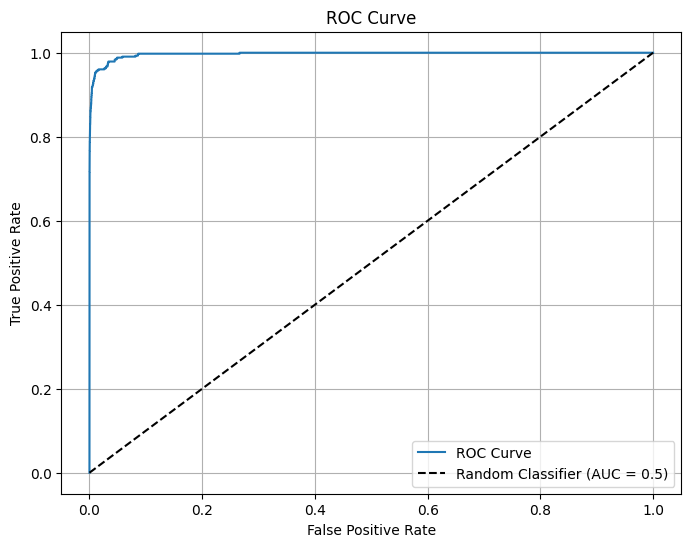

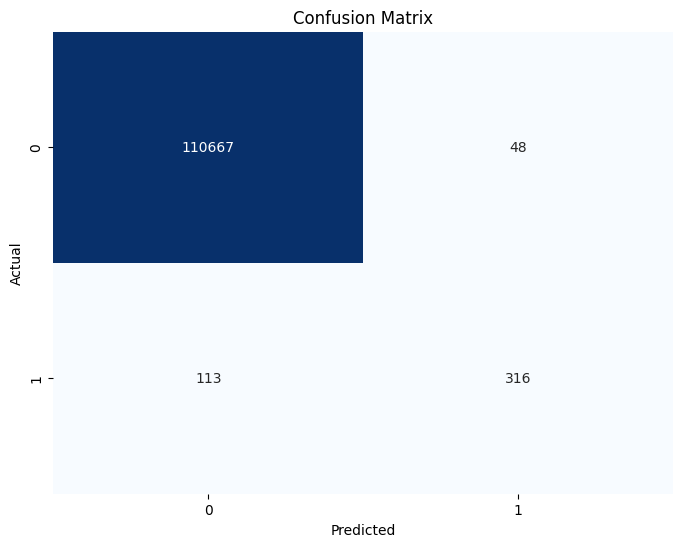

In [ ]:
# Compute metrics
cm = confusion_matrix(y_test, y_pred)
auc_roc = round(roc_auc_score(y_test, y_pred_proba), 5)
acc = round(accuracy_score(y_test, y_pred), 5)
recall = round(recall_score(y_test, y_pred), 5)
precision = round(precision_score(y_test, y_pred), 5)
f1 = round(f1_score(y_test, y_pred), 5)


metrics_dict_ml['RF: Smoteen'] = {'AUC-ROC': auc_roc, 'Accuracy': acc, 'Recall': recall, 'Precision': precision, 'F1 Score': f1}

# Print metrics
print(f"AUC-ROC: {auc_roc}")
print(f"Accuracy: {acc}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")

# Plot ROC Curve
fpr_rus, tpr_rus, thresholds_rus = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rus, tpr_rus, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import pickle

# Save model
with open('/content/drive/MyDrive/Thesis/Models/pickles/smoteen_rf.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

### b. Extreme Gradient Boost (XGBoost)


In [ ]:
from xgboost import XGBClassifier


In [ ]:
# Select features and target
X_train = smoteen.drop('is_fraud', axis=1)
y_train = smoteen['is_fraud']

# Assume the test dataset is already split into features and target
X_test = test.drop('is_fraud', axis=1)
y_test = test['is_fraud']

# Initialize and fit logistic regression model
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Predict probabilities on test set
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# Predict on test set
y_pred = xgb_model.predict(X_test)

AUC-ROC: 0.99733
Accuracy: 0.99802
Recall: 0.86713
Precision: 0.69533
F1 Score: 0.77178


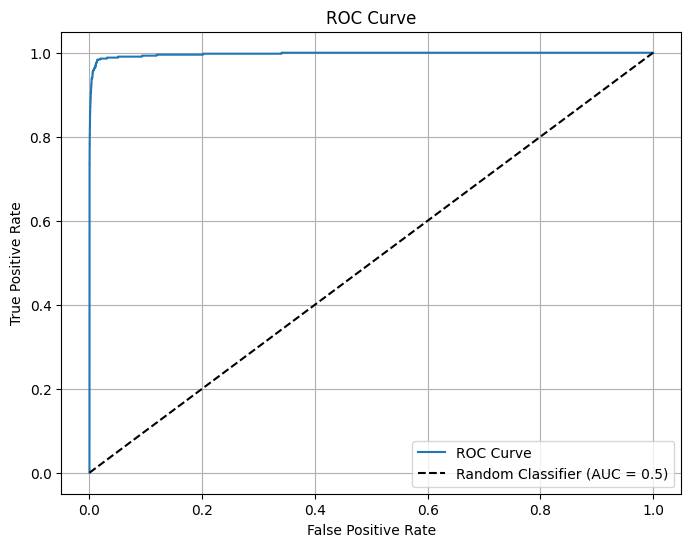

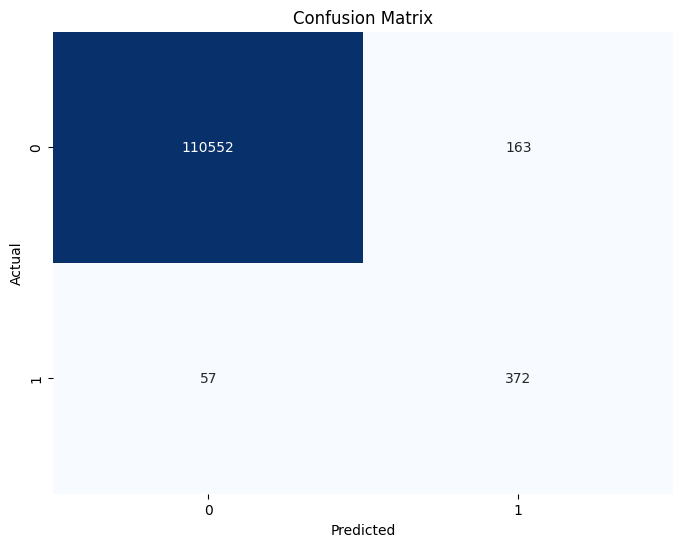

In [ ]:
# Compute metrics
cm = confusion_matrix(y_test, y_pred)
auc_roc = round(roc_auc_score(y_test, y_pred_proba), 5)
acc = round(accuracy_score(y_test, y_pred), 5)
recall = round(recall_score(y_test, y_pred), 5)
precision = round(precision_score(y_test, y_pred), 5)
f1 = round(f1_score(y_test, y_pred), 5)


metrics_dict_ml['XGB: Smoteen'] = {'AUC-ROC': auc_roc, 'Accuracy': acc, 'Recall': recall, 'Precision': precision, 'F1 Score': f1}

# Print metrics
print(f"AUC-ROC: {auc_roc}")
print(f"Accuracy: {acc}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")

# Plot ROC Curve
fpr_rus, tpr_rus, thresholds_rus = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rus, tpr_rus, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import pickle

# Save model
with open('/content/drive/MyDrive/Thesis/Models/pickles/smoteen_xgb.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)

 ### c. LightGBM

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [ ]:
# Select features and target
X_train = smoteen.drop('is_fraud', axis=1)
y_train = smoteen['is_fraud']

# Assume the test dataset is already split into features and target
X_test = test.drop('is_fraud', axis=1)
y_test = test['is_fraud']

# Initialize and fit logistic regression model
lgb_model =  LGBMClassifier(objective='binary', metric='auc', verbose=100)
lgb_model.fit(X_train, y_train)

# Predict probabilities on test set
y_pred_proba = lgb_model.predict_proba(X_test)[:, 1]

# Predict on test set
y_pred = lgb_model.predict(X_test)

[LightGBM] [Info] Number of positive: 442859, number of negative: 439881
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.099897
[LightGBM] [Debug] init for col-wise cost 0.000008 seconds, init for row-wise cost 0.092996 seconds
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.032444 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Dense Multi-Val Bin
[LightGBM] [Info] Total Bins 1598
[LightGBM] [Info] Number of data points in the train set: 882740, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501687 -> initscore=0.006747
[LightGBM] [Info] Start training from score 0.006747
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug] Tr

AUC-ROC: 0.99664
Accuracy: 0.99606
Recall: 0.88345
Precision: 0.49413
F1 Score: 0.63378


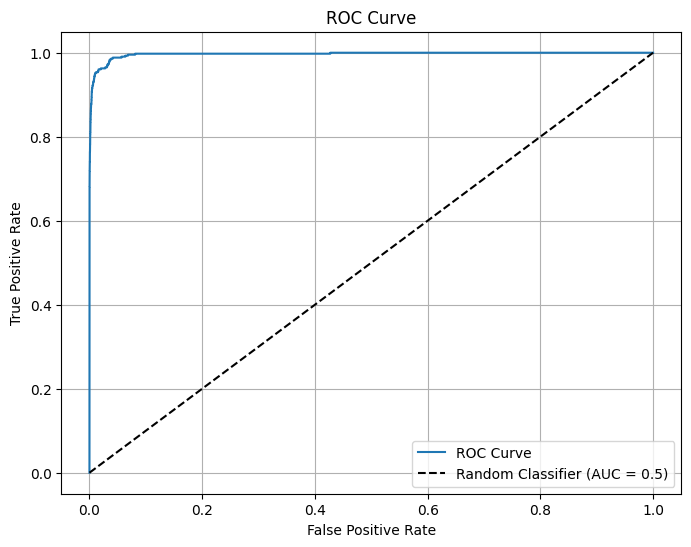

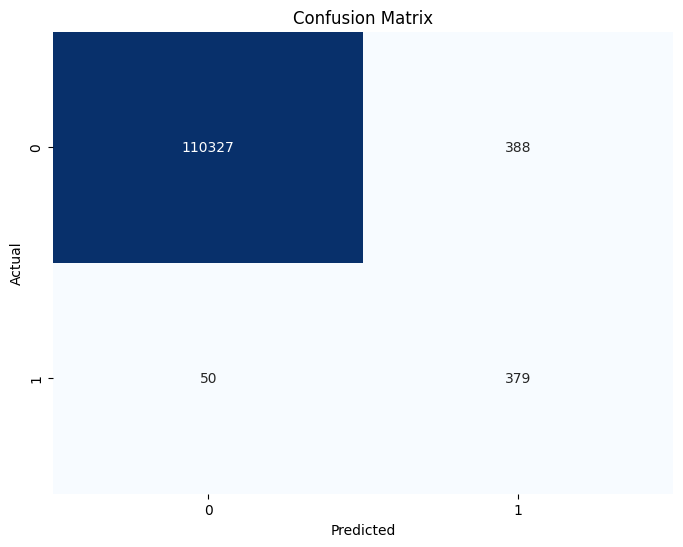

In [ ]:
# Compute metrics
cm = confusion_matrix(y_test, y_pred)
auc_roc = round(roc_auc_score(y_test, y_pred_proba), 5)
acc = round(accuracy_score(y_test, y_pred), 5)
recall = round(recall_score(y_test, y_pred), 5)
precision = round(precision_score(y_test, y_pred), 5)
f1 = round(f1_score(y_test, y_pred), 5)


metrics_dict_ml['LGBM: Smoteen'] = {'AUC-ROC': auc_roc, 'Accuracy': acc, 'Recall': recall, 'Precision': precision, 'F1 Score': f1}

# Print metrics
print(f"AUC-ROC: {auc_roc}")
print(f"Accuracy: {acc}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")

# Plot ROC Curve
fpr_rus, tpr_rus, thresholds_rus = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rus, tpr_rus, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import pickle

# Save model
with open('/content/drive/MyDrive/Thesis/Models/pickles/smoteen_lgbm.pkl', 'wb') as file:
    pickle.dump(lgb_model, file)

### d. Ensemble models

In [ ]:
# # Splitting the data into features (X) and labels (y)
# X = SmoTeendf.drop('Class', axis=1)
# y = SmoTeendf['Class']

# # Splitting the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# # Initialize and train the Random Forest classifier
# rf_classifier = RandomForestClassifier()
# rf_classifier.fit(X_train, y_train)

# # Initialize and train the LightGBM classifier
# lgb_classifier = lgb.LGBMClassifier(objective='binary', metric='auc', verbose=100)
# lgb_classifier.fit(X_train, y_train)



In [ ]:
# from sklearn.ensemble import VotingClassifier

# # Combine the two classifiers into an ensemble
# ensemble_model = VotingClassifier(estimators=[
#     ('Random Forest', rf_classifier),
#     ('LightGBM', lgb_classifier)], voting='soft')  # Using soft voting for classifiers that output probabilities

# # Train the ensemble model
# ensemble_model.fit(X_train, y_train)

# # Make predictions using the ensemble model
# y_pred_ensemble = ensemble_model.predict(X_test)

In [ ]:
# # Evaluating the performance of the ensemble
# accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
# print("Accuracy (Ensemble):", accuracy_ensemble)

# # Generating a classification report for the ensemble
# print("Classification Report (Ensemble):")
# print(classification_report(y_test, y_pred_ensemble, digits=5))



In [ ]:
# # Calculating AUC-ROC for the ensemble
# y_pred_proba_ensemble = ensemble_model.predict_proba(X_test)[:, 1]
# auc_roc_ensemble = roc_auc_score(y_test, y_pred_proba_ensemble)
# print("AUC-ROC (Ensemble):", auc_roc_ensemble)

# # Generating ROC curve for the ensemble
# fpr_ensemble, tpr_ensemble, _ = roc_curve(y_test, y_pred_proba_ensemble)
# plt.figure(figsize=(8, 6))
# plt.plot(fpr_ensemble, tpr_ensemble, color='blue', label='ROC curve (AUC = %0.2f)' % auc_roc_ensemble)
# plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier (AUC = 0.50)')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve (Ensemble)')
# plt.legend(loc="lower right")
# plt.show()

# Comparitive Analysis Between All Sampling Techniques

In [ ]:
metrics_df_ml = pd.DataFrame.from_dict(metrics_dict_ml, orient='index')
metrics_df_ml

,AUC-ROC,Accuracy,Recall,Precision,F1 Score
RF: Random Undersampling,0.99664,0.96958,0.96270,0.10932,0.19634
XGB: Random Undersampling,0.99592,0.96781,0.98135,0.10549,0.19050
LGBM: Random Undersampling,0.99673,0.97023,0.97669,0.11269,0.20207
RF: TomekLinks,0.99673,0.99852,0.62937,0.97826,0.76596
XGB: Tomeklinks,0.99859,0.99912,0.80886,0.95592,0.87626
LGBM: TomekLinks,0.89471,0.99718,0.69697,0.62033,0.65642
RF: Random Oversampling,0.89471,0.99874,0.69697,0.96764,0.81030
XGB: Random Oversampling,0.99845,0.99760,0.92308,0.62857,0.74788
LGBM: Random Oversampling,0.99824,0.99162,0.95804,0.31042,0.46891
RF: Smote,0.99592,0.99870,0.72028,0.92793,0.81102


In [ ]:
# Save the DataFrame to a CSV file
metrics_df_ml.to_csv('/content/drive/MyDrive/Thesis/CSVs/metrics_df_ml.csv', index=True)


### UNDERSAMPLING GRAPH

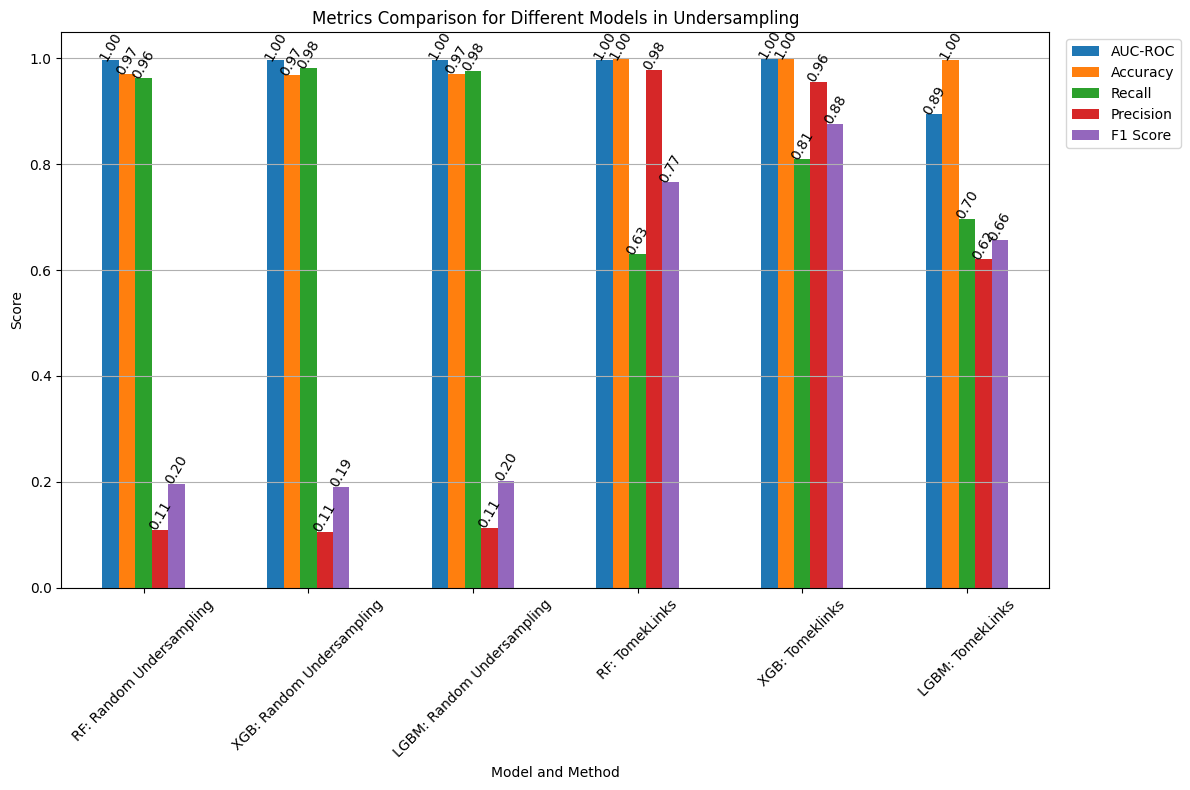

In [ ]:
# Plot metrics comparison
undersampling_methods = [
    'RF: Random Undersampling', 'XGB: Random Undersampling', 'LGBM: Random Undersampling',
    'RF: TomekLinks', 'XGB: Tomeklinks', 'LGBM: TomekLinks'
]

filtered_metrics_df_undersampling = metrics_df_ml.loc[undersampling_methods]

# Plot metrics comparison for undersampling methods
plt.figure(figsize=(12, 8))
ax = filtered_metrics_df_undersampling.iloc[:, :].plot(kind='bar', ax=plt.gca())
plt.title('Metrics Comparison for Different Models in Undersampling')
plt.xlabel('Model and Method')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.01, 1), loc="upper left")

# Annotate bars with metric values
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', rotation=60, xytext=(0, 10), textcoords='offset points')

plt.grid(axis='y')
plt.tight_layout()
plt.show()

### OverSampling Graph

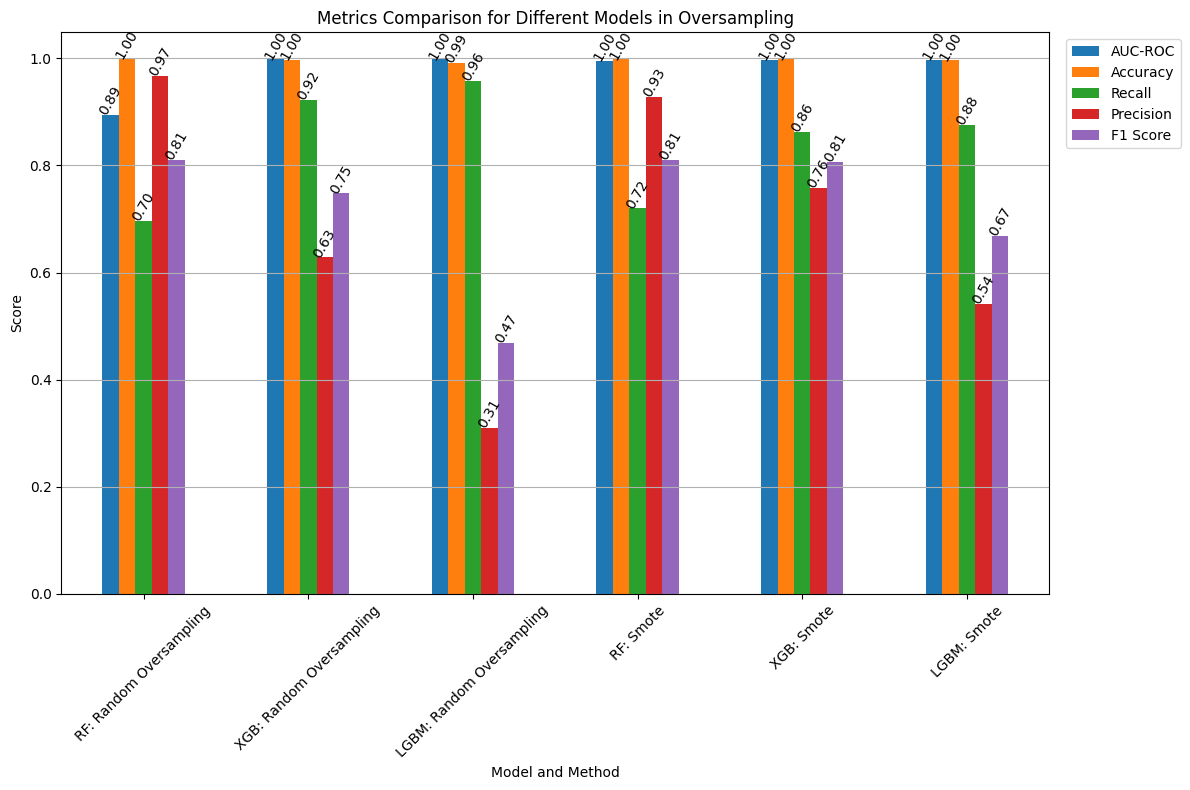

In [ ]:
# Plot metrics comparison
oversampling_methods = [
    'RF: Random Oversampling', 'XGB: Random Oversampling', 'LGBM: Random Oversampling',
    'RF: Smote', 'XGB: Smote', 'LGBM: Smote'
]

filtered_metrics_df_oversampling = metrics_df_ml.loc[oversampling_methods]

# Plot metrics comparison for oversampling methods
plt.figure(figsize=(12, 8))
ax = filtered_metrics_df_oversampling.iloc[:, :].plot(kind='bar', ax=plt.gca())
plt.title('Metrics Comparison for Different Models in Oversampling')
plt.xlabel('Model and Method')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.01, 1), loc="upper left")

# Annotate bars with metric values
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', rotation=60, xytext=(0, 10), textcoords='offset points')

plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Oversampling followed by undersampling graph

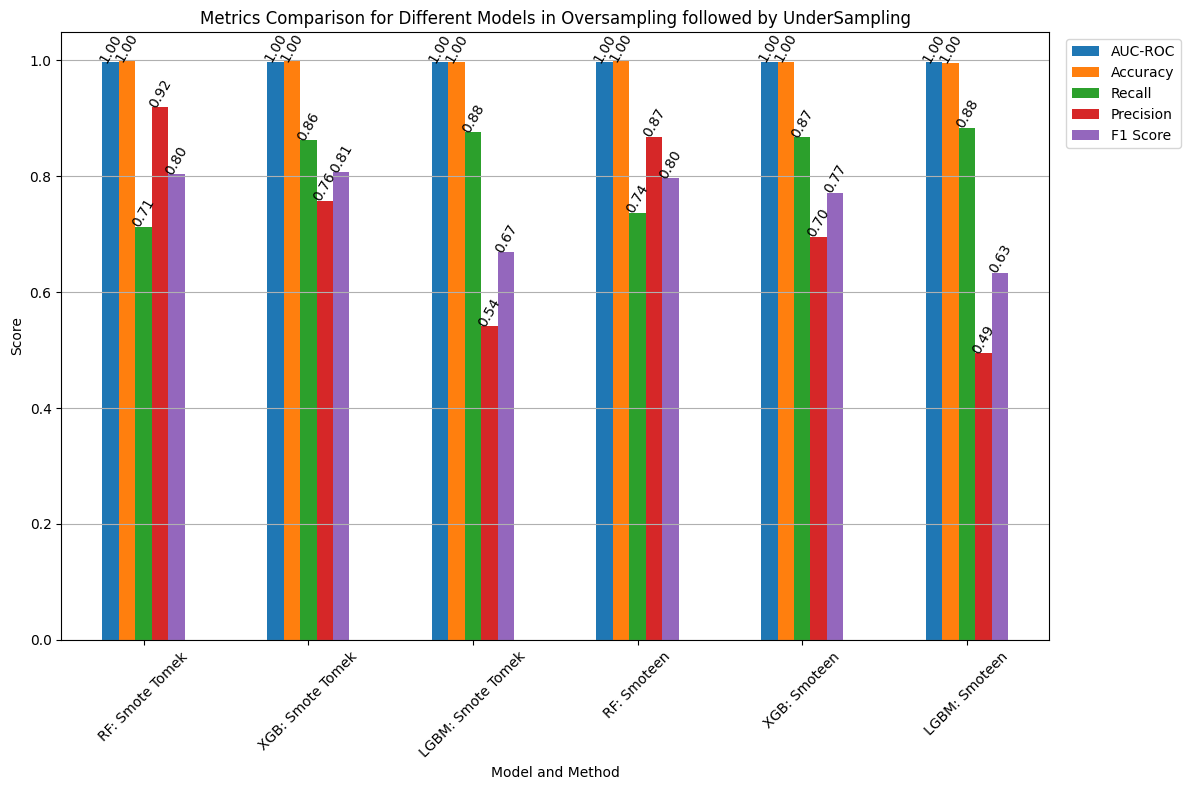

In [ ]:
# Plot metrics comparison
over_under_methods = [
    'RF: Smote Tomek', 'XGB: Smote Tomek', 'LGBM: Smote Tomek',
    'RF: Smoteen', 'XGB: Smoteen', 'LGBM: Smoteen'
]

filtered_metrics_df_over_under = metrics_df_ml.loc[over_under_methods]

# Plot metrics comparison for oversampling methods
plt.figure(figsize=(12, 8))
ax = filtered_metrics_df_over_under.iloc[:, :].plot(kind='bar', ax=plt.gca())
plt.title('Metrics Comparison for Different Models in Oversampling followed by UnderSampling')
plt.xlabel('Model and Method')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.01, 1), loc="upper left")

# Annotate bars with metric values
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', rotation=60, xytext=(0, 10), textcoords='offset points')

plt.grid(axis='y')
plt.tight_layout()
plt.show()

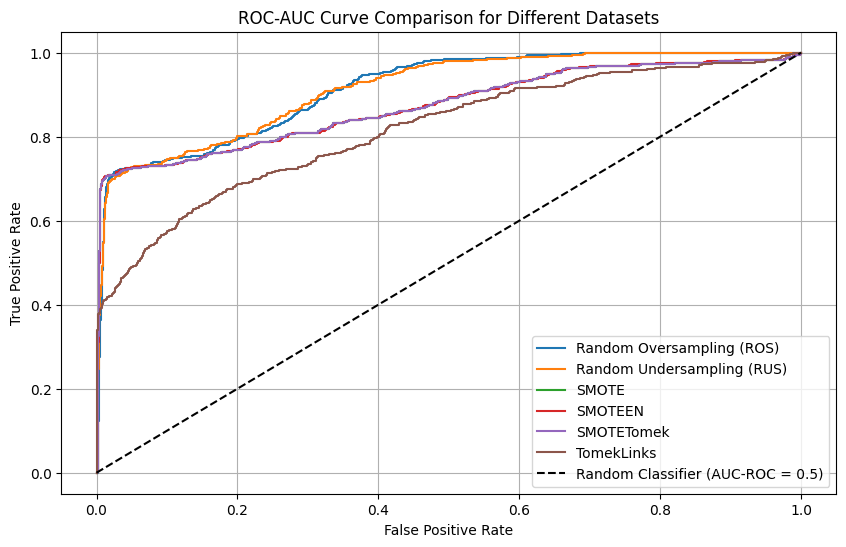

In [ ]:
# Plot ROC-AUC Curves
plt.figure(figsize=(10, 6))

# Plot ROC curves for each dataset
plt.plot(fpr_ros, tpr_ros, label='Random Oversampling (ROS)')
plt.plot(fpr_rus, tpr_rus, label='Random Undersampling (RUS)')
plt.plot(fpr_smote, tpr_smote, label='SMOTE')
plt.plot(fpr_smoteen, tpr_smoteen, label='SMOTEEN')
plt.plot(fpr_smtk, tpr_smtk, label='SMOTETomek')
plt.plot(fpr_tkl, tpr_tkl, label='TomekLinks')

# Plot random classifier line
plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random Classifier (AUC-ROC = 0.5)')

# Set plot labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve Comparison for Different Datasets')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

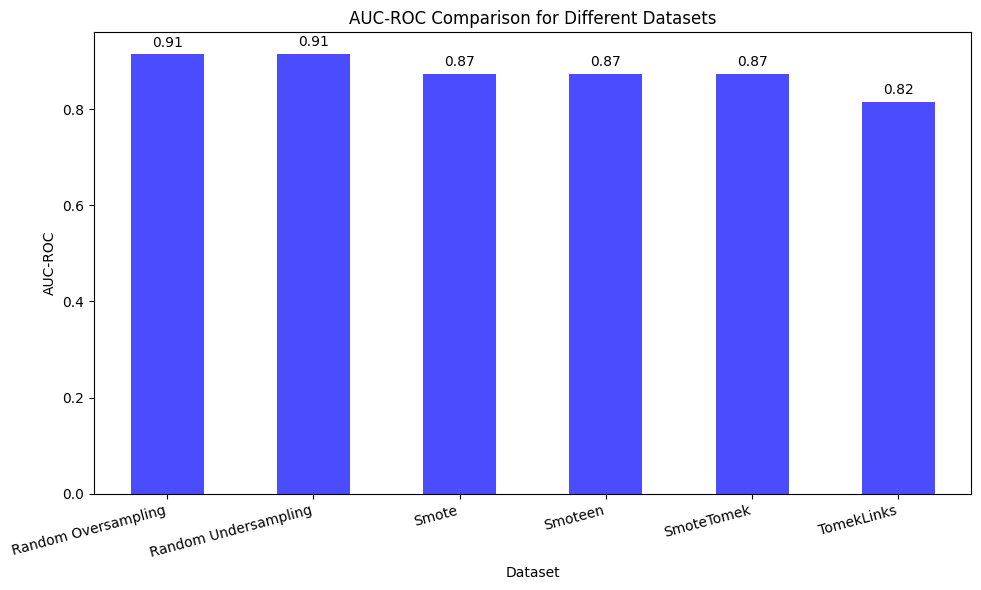

In [ ]:
# Plot AUC-ROC values
plt.figure(figsize=(10, 6))
metrics_df['AUC-ROC'].plot(kind='bar', color='blue', alpha=0.7)

# Add labels and title
plt.title('AUC-ROC Comparison for Different Datasets')
plt.xlabel('Dataset')
plt.ylabel('AUC-ROC')

# Add value labels on top of each bar
for i, auc_roc in enumerate(metrics_df['AUC-ROC']):
    plt.text(i, auc_roc + 0.01, f'{auc_roc:.2f}', ha='center', va='bottom')

# Show plot
plt.xticks(rotation=15, ha='right')
plt.tight_layout()
plt.show()
